In [27]:
#@title imports 
import os
import pickle
from typing import Set
# from jedi import settings
import numpy as np 
import matplotlib.pyplot as plt
from numpy.lib.function_base import append 
import scipy.io as spio
from scipy.io import loadmat, savemat
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from scipy.sparse import data 
import pandas as pd 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import SparsePCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# import umap.plot as uplot
from sknetwork.clustering import Louvain,get_modularity
from sknetwork.data import karate_club
import sys 

sys.path.append('C:/Users/Nishant Joshi/Downloads/Old_code/repo/single_cell_analysis/scripts')
from utils import *
from sknetwork.clustering import Louvain,get_modularity
from sknetwork.data import karate_club
import umap
sys.path.append(os.getcwd()+'/../scripts/')
from UMAP_utils import *
sys.path.append('C:/Users/Nishant Joshi/Model_fitting/GIFFittingToolbox/src/examples/')
from cluster_stability import *

In [28]:

def binarize_EI_labels(labels, e_vals):
    temp_labels = labels
    for idx,vals in enumerate(labels):
        if vals in e_vals:
            temp_labels[idx] =1
        else:
            temp_labels[idx] =0 

    return temp_labels



In [29]:
savepath = 'D:/Data For Publication/figures/part2/'

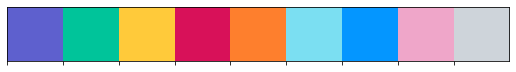

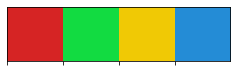

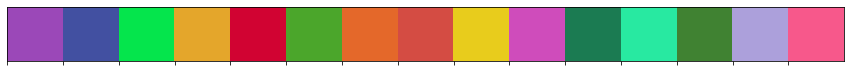

In [30]:
pal = ["#00202e","#003f5c","#2c4875","#8a508f","#bc5090","#ff6361","#ff8531","#ffa600","#ffd380",[0.969,	0.349, 0.549]]
CUSTOM_PAL_SORT_3 = ['#5e60ce','#00c49a','#ffca3a','#D81159','#fe7f2d','#7bdff2','#0496ff','#efa6c9','#ced4da']
GMM_PAL = ['#d62424','#12db41','#f0c905','#248cd6']

# In RGB form
coherence_colors = [[0.609, 0.283, 0.724],
                    [0.259,	0.314, 0.635],
                    [0.02,	0.9, 0.3],
                    [0.898,	0.654, 0.169],
                    [0.821, 0.012, 0.198],
                    [0.298,	0.654, 0.169],
                    [0.898,	0.41 , 0.165],  
                    [0.834,	0.3 , 0.265],
                    [0.912,	0.8 , 0.112],
                    [0.812,	0.3 , 0.734],
                    [0.109, 0.483, 0.324],
                    [0.159,	0.914, 0.635],
                    [0.251,	0.512, 0.198],
                    [0.676,	0.631, 0.859],
                    [0.969,	0.349, 0.549],]
sns.palplot(CUSTOM_PAL_SORT_3)
sns.palplot(GMM_PAL)
sns.palplot(coherence_colors)

In [31]:
discarded_exps = ['xuan_151118_E1',
'xuan_15319_E1' ,
'xuan_20919_E2',
'xuan_27919_E1',
'xuan_27919_E2',
'xuan_27919_E3',
'NC_20717_E5' ,
'NC_25717_E2',
'payam_31019_E5',
'payam_101019_E5',
'NC_24717_E1']

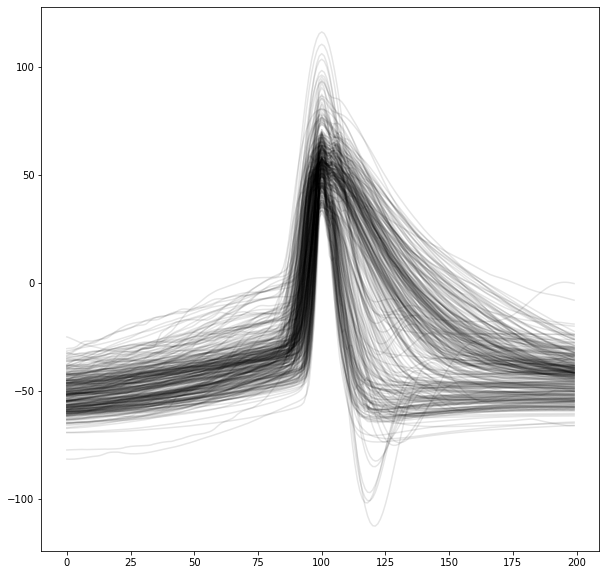

In [32]:
# %matplotlib widget

ephys = pd.read_pickle("D:/FN_analysed_feat_set/Ephys_collection_all_exps_all_conds_spikes_calculated_5ms.pkl")
ephys = ephys[~ephys.exp_name.isin(discarded_exps)]


data_ephys_FN_acsf = ephys[ephys.cond.isin(['acsf','acsf_bic'])][ephys.columns[1:]]
data_ephys_FN_acsf = data_ephys_FN_acsf[data_ephys_FN_acsf.trialnr==0]

data_wave_FN_acsf = ephys[ephys.cond.isin(['acsf','acsf_bic'])][['waveform','tau', 'exp_name', 'cond', 'trialnr']]
data_wave_FN_acsf=data_wave_FN_acsf[data_wave_FN_acsf.trialnr==0]
# data_wave_FN_acsf.drop_duplicates('exp_name')

# exps_with_double_trials = np.array(data_wave_FN_acsf.exp_name)[list(np.where(np.unique(data_wave_FN_acsf.exp_name,return_counts=True)[1]>1)[0])]
# data_wave_FN_acsf = data_wave_FN_acsf[data_wave_FN_acsf.trialnr==0]

fig,ax = plt.subplots(figsize=[10,10])
# plt.ion
plt.plot(np.vstack(data_wave_FN_acsf['waveform']).T,c='k',alpha=0.1)
# plt.xticks([])
# plt.yticks([])
plt.show()

In [157]:
data_wave_FN_acsf.loc[198]

waveform       [-61.25989117134658, -61.04271748827824, -60.8...
tau                                                          250
exp_name                                             NC_61017_E7
cond                                                        acsf
trialnr                                                        0
labels_wave                                                    5
Name: 198, dtype: object

In [153]:

np.argmin(data_ephys_FN_acsf['mean_width'])

198

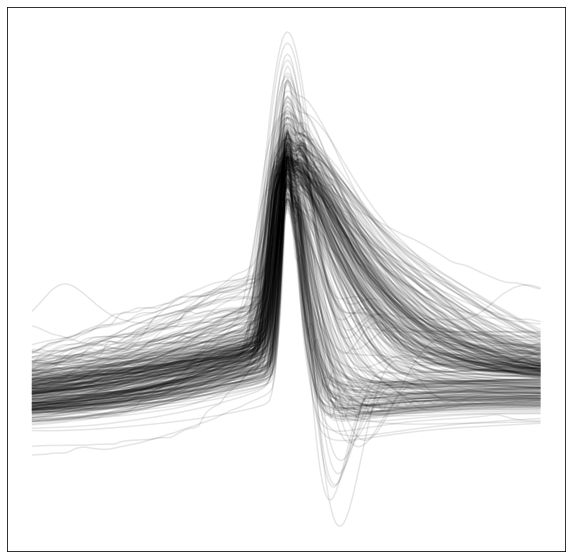

In [21]:
data_first = pd.read_pickle('D:/FN_analysed_feat_set/Ephys_collection_all_exps_all_conds_first_spks_calculated.pkl')
data_second = pd.read_pickle('D:/FN_analysed_feat_set/Ephys_collection_all_exps_all_conds_second_spks_calculated.pkl')


data_first = data_first[~data_first.exp_name.isin(discarded_exps)]
data_second = data_second[~data_second.exp_name.isin(discarded_exps)]


data_ephys_FN_acsf_first = data_first[data_first.cond.isin(['acsf','acsf_bic'])][data_first.columns[1:]]
data_ephys_FN_acsf_first = data_ephys_FN_acsf_first[data_ephys_FN_acsf_first.trialnr==0]
data_wave_FN_acsf_first  = data_first[data_first.cond.isin(['acsf','acsf_bic'])][['waveform','tau', 'exp_name', 'cond', 'trialnr']]
data_wave_FN_acsf_first  = data_wave_FN_acsf_first[data_wave_FN_acsf_first.trialnr==0]
data_wave_FN_acsf_first.drop_duplicates('exp_name')

fig,ax = plt.subplots(figsize=[10,10])
# plt.ion
plt.plot(np.vstack(data_wave_FN_acsf_first['waveform']).T,c='k',alpha=0.1)
plt.xticks([])
plt.yticks([])
plt.show()


In [9]:
# waves_first = normalize(np.vstack(data_wave_FN_acsf_first['waveform']))

# labels_wave,mapper,reducer = plot_UMAP_clusters_single(waves_first,
#                           20,
#                           0.1,
#                           random_state =42,
#                           res_louvain = 1.,
#                           c_list =coherence_colors,
#                           norm=False,
#                           size=100,
#                           save= True,
#                           savepath = savepath+'wave_cluster.pdf')

# # waves_second = normalize(np.vstack(data_wave_FN_acsf_second['waveform']))
# data_wave_FN_acsf_first.labels_wave = labels_wave



c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


8


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


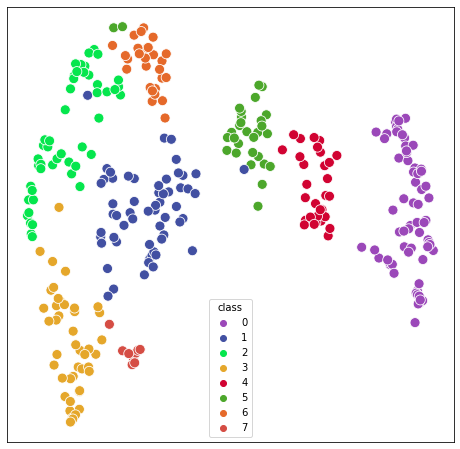

In [33]:
waves = normalize(np.vstack(data_wave_FN_acsf['waveform']))

labels_wave,mapper,reducer = plot_UMAP_clusters_single(waves,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list =coherence_colors,
                          norm=False,
                          save=True,
                          savepath = savepath+'wave_cluster.pdf',
                          size=100
                          )
data_wave_FN_acsf['labels_wave'] = labels_wave


0.0

0.5

1.0

1.5

2.0

2.5

3.0

3.5

4.0

4.5

5.0


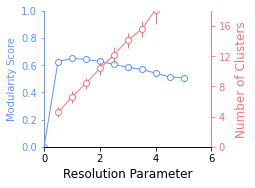

In [9]:
waves_scaler = StandardScaler()
find_optimum_res(waves_scaler.fit_transform(waves),save=True,savepath=savepath+'waves_cluster_stability.pdf')

0
1
2
3
4
5
6
7


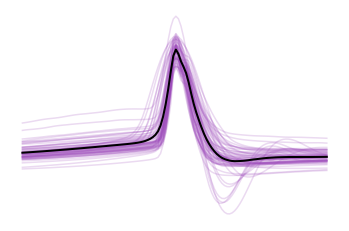

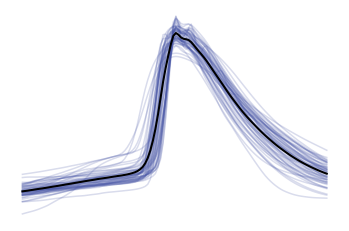

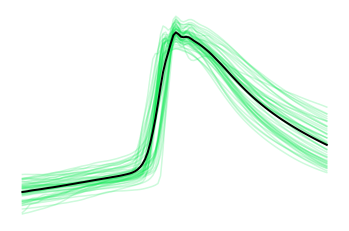

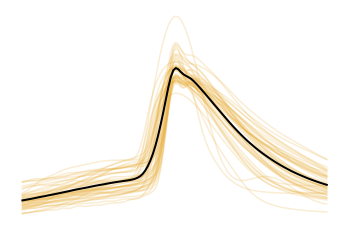

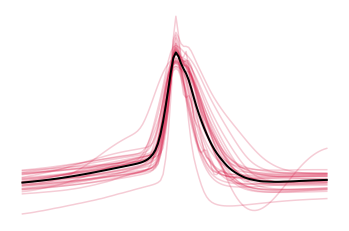

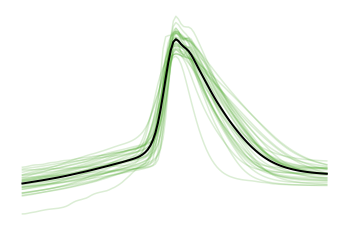

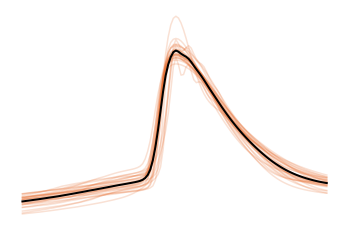

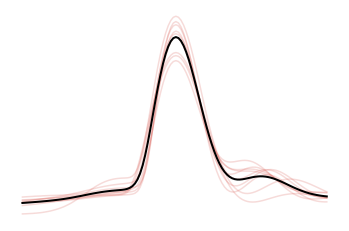

In [10]:
for i in set(labels_wave):
    print(i)
    t = np.arange(0,6,1/20)
    fig,ax = plt.subplots()
    fig.patch.set_visible(False)
    ax.axis('off')
    # data_wave_FN_acsf[data_wave_FN_acsf.labels_wave==i]['half_width']
    wave_i = np.vstack(data_wave_FN_acsf[data_wave_FN_acsf.labels_wave==i]['waveform']).T
    plt.plot(t,wave_i[-int(8*20):int(-2*20),:],c=coherence_colors[i],alpha=0.2)
    plt.plot(t,np.mean(wave_i,axis=1)[-int(8*20):int(-2*20)],c='black',linewidth=2,label=i)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(savepath+'wave_'+str(i)+'.pdf',dpi=200)
    # plt.show()
# plt.legend()

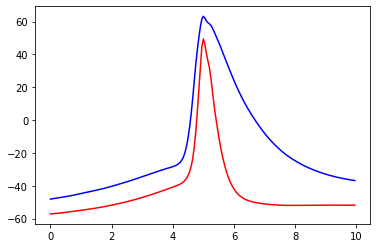

In [34]:
plt.plot(np.arange(0,10,1/20),np.mean(np.vstack(data_wave_FN_acsf[data_wave_FN_acsf.labels_wave.isin([0,4,5])]['waveform']).T,axis=1),c='red')
plt.plot(np.arange(0,10,1/20),np.mean(np.vstack(data_wave_FN_acsf[~data_wave_FN_acsf.labels_wave.isin([0,4,5])]['waveform']).T,axis=1),c='blue')
plt.savefig(savepath+'average_waveform.pdf',dpi=200)

## Electrophysiology

In [35]:
data_ephys_FN_acsf['labels_wave'] = labels_wave

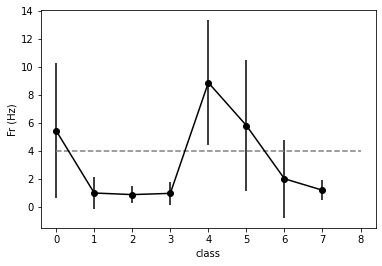

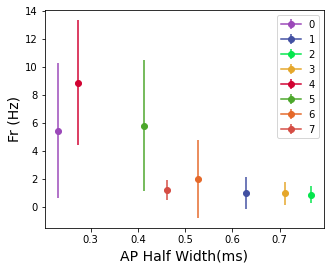

In [36]:
frs = []
ap_width = []  
frs_std = []
ap_width_std = []

for i in set(data_ephys_FN_acsf['labels_wave']):
    frs.append(np.mean(data_ephys_FN_acsf[data_ephys_FN_acsf.labels_wave==i]['fr']))
    frs_std.append(np.std(data_ephys_FN_acsf[data_ephys_FN_acsf.labels_wave==i]['fr']))

    ap_width.append(np.mean(data_ephys_FN_acsf[data_ephys_FN_acsf.labels_wave==i]['mean_width']))
    ap_width_std.append(np.std(data_ephys_FN_acsf[data_ephys_FN_acsf.labels_wave==i]['mean_width']))

plt.errorbar(list(set(data_ephys_FN_acsf['labels_wave'])),frs,yerr=frs_std,marker='o',c='black')
plt.hlines(4,0,8,linestyles='dashed',color='grey')
plt.ylabel('Fr (Hz)')
plt.xlabel('class')
plt.show()
fig,ax = plt.subplots(figsize = [5,4])
for i in range(len(ap_width)):
    ax.errorbar(ap_width[i],frs[i],marker='o',yerr=frs_std[i],c=coherence_colors[i],label = list(set(data_ephys_FN_acsf['labels_wave']))[i])
    ax.set_ylabel('Fr (Hz)',fontsize=14)
    
    ax.set_xlabel('AP Half Width(ms)',fontsize=14)
    ax.legend()

plt.savefig(savepath+'AP_width_vs_FR.pdf')
plt.show()

<Axes: >

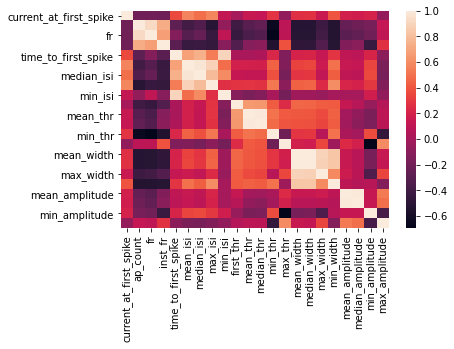

In [82]:
sns.heatmap(data_ephys_FN_acsf[['current_at_first_spike', 'ap_count', 'fr', 'inst_fr',
       'time_to_first_spike', 'mean_isi', 'median_isi', 'max_isi', 'min_isi',
       'first_thr', 'mean_thr', 'median_thr', 'min_thr', 'max_thr',
       'mean_width', 'median_width', 'max_width', 'min_width',
       'mean_amplitude', 'median_amplitude', 'min_amplitude', 'max_amplitude',]].corr())


In [67]:

ephys_exc  = data_ephys_FN_acsf[data_ephys_FN_acsf.labels_wave.isin([1,2,3,6,7])]
ephys_inh  = data_ephys_FN_acsf[data_ephys_FN_acsf.labels_wave.isin([0,5,4])]
print(len(ephys_exc),len(ephys_inh))


186 126



0.0

0.5

1.0

1.5

2.0

2.5

3.0

3.5

4.0

4.5

5.0

0.0

0.5

1.0

1.5

2.0

2.5

3.0

3.5

4.0

4.5

5.0


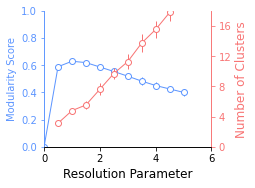

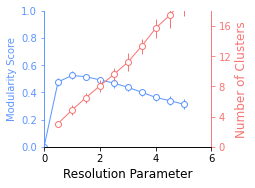

In [17]:
cols =  data_ephys_FN_acsf.columns[:-6]
data_umap_scaler = StandardScaler()

find_optimum_res(data_umap_scaler.fit_transform(normalize(ephys_exc[cols].to_numpy())),save=True,savepath=savepath+'exc_ephys_cluster_stability.pdf')
find_optimum_res(data_umap_scaler.fit_transform(normalize(ephys_inh[cols].to_numpy())),save=True,savepath=savepath+'inh_ephys_cluster_stability.pdf')

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


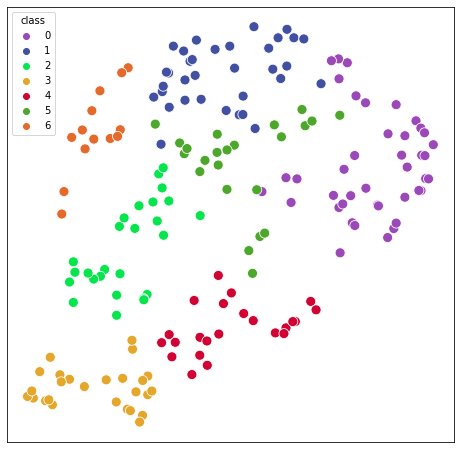

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


6


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


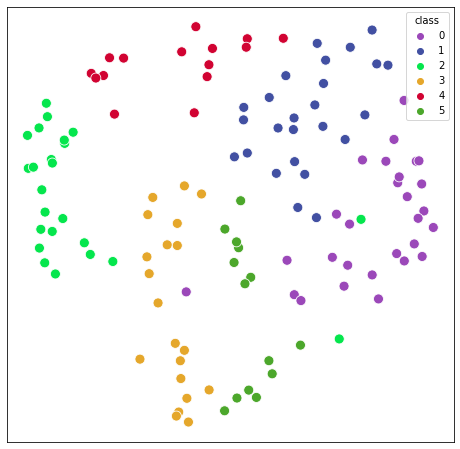

<ipython-input-68-cd246672fe33>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ephys_exc['labels_ephys'] = lables_ephys_exc
<ipython-input-68-cd246672fe33>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ephys_inh['labels_ephys'] = lables_ephys_inh


In [68]:
cols =  data_ephys_FN_acsf.columns[:-6]
ephys_data = normalize(np.vstack(ephys_exc[cols].to_numpy()),axis=0)
lables_ephys_exc,mapper,reducer = plot_UMAP_clusters_single(ephys_data,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list =coherence_colors,
                        #   title='UMAP+Louvain for waveforms'
                          norm=False,
                          size=100,
                          save = False,
                          savepath = savepath+'exc_ephys_cluster.pdf'
                          )

ephys_data = normalize(np.vstack(ephys_inh[cols].to_numpy()),axis=0)
lables_ephys_inh,mapper,reducer = plot_UMAP_clusters_single(ephys_data,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list =coherence_colors,
                          norm=False,
                          size=100,
                          save = False,
                          savepath = savepath+'inh_ephys_cluster.pdf'
                        #   title='UMAP+Louvain for waveforms',
                          )
ephys_exc['labels_ephys'] = lables_ephys_exc
ephys_inh['labels_ephys'] = lables_ephys_inh 

In [109]:
import paxplot
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import normalize

def pax_plot_data(data,cols,labels,pallete,savepath, save= False):
    # # Import data

    scaler_min = MinMaxScaler()
    scaler_std = StandardScaler()
    # scaler_norm = normalize()
    data_to_plot = data
    cols = cols
    labels =  labels
    # Create figure
    paxfig = paxplot.pax_parallel(n_axes=len(cols))
    paxfig.set_figheight(10)
    paxfig.set_figwidth(30)

    scaled_min = scaler_min.fit_transform(data_to_plot.to_numpy())

    scaled_std = scaler_std.fit_transform(data_to_plot.to_numpy())

    scaled_norm = normalize(data_to_plot.to_numpy(),axis=0)

    for i in list(set(labels)):
        idx = np.where(labels==i)
        paxfig.plot(
            scaled_min[idx[0],:], 
            line_kwargs={'alpha': 0.1, 'color': pallete[i], 'zorder': 1}
        )

        paxfig.plot(
            [np.mean(scaled_min[idx[0],:],axis=0)], 
            line_kwargs={'alpha': 1., 'color': pallete[i],'linewidth':2, 'zorder': 1}
        )

    for  ax in paxfig.axes:   
        ax.set_yticks([0,0.5,1])
        ax.tick_params(axis='x', labelsize=20,rotation=90)
        ax.tick_params(axis='y', labelsize=10)
    # # Add labels
    paxfig.set_labels(cols)
    # paxfig.legend()
    if save: 
        plt.savefig(savepath,dpi=300)

    plt.show()


def plot_radar(data,cols,labels,palette=None,figsize=(6, 6),lims=None, logscale=True,plot_neg_log=False,save=False,savepath=None,):
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(polar=True))

    cols_ = cols
    data_norm = normalize(data[cols_].to_numpy(),axis=0)
    # Data
    categories = cols_
    for i in list(set(labels)):
        idx = labels==i
        values_1 = data_norm[idx,:]

        # Number of variables we're plotting.
        num_vars = len(cols_)

        # Compute angle of each axis.
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

        # The plot is a circle, so we need to "complete the loop".
        # Append the start value to the end.
        values_1 = np.insert(values_1,[values_1.shape[1]],values_1[:,:1],axis=1)
        angles += angles[:1]

        # Create the figure.

        # Draw one axe per variable and add labels.
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)
        plt.xticks(angles[:-1], categories,fontsize=12,)
        for label, angle in zip(ax.get_xticklabels(), angles):
            x, y = label.get_position()
            label.set_position((x, y-0.2 ))  # Adjust the value to move labels further out

        # Draw ylabels.
        if logscale:
            ax.set_rscale('log')
            ax.plot(angles, values_1.T, linewidth=1,c=palette[i], linestyle='solid',alpha=0.1 )

            ax.plot(angles, np.mean(values_1.T,axis=1), linewidth=3,c=palette[i], linestyle='solid',alpha=.8 )
            ax.set_ylim(lims)
        elif plot_neg_log:
            ax.set_rscale('log')

            ax.plot(angles, values_1.T*-1, linewidth=1,c=palette[i], linestyle='solid',alpha=0.1 )

            ax.plot(angles, np.mean(values_1.T*-1,axis=1), linewidth=3,c=palette[i], linestyle='solid',alpha=.8 )
            ax.set_ylim(lims)
        else:
            # ax.set_rscale('log')

            ax.plot(angles, values_1.T, linewidth=1,c=palette[i], linestyle='solid',alpha=0.1 )

            ax.plot(angles, np.mean(values_1.T,axis=1), linewidth=3,c=palette[i], linestyle='solid',alpha=.8 )
            ax.set_ylim(lims)
    if save:
        plt.savefig(savepath,dpi=200)
    else:
        plt.show()    

In [17]:
cols_spikes   = ['current_at_first_spike', 'ap_count', 'fr', 'inst_fr','time_to_first_spike', 'mean_isi', 'median_isi', 'max_isi', 'min_isi',]
cols_thrs     = ['first_thr', 'mean_thr', 'median_thr', 'min_thr', 'max_thr',]
cols_wf       = ['mean_width', 'median_width', 'max_width', 'min_width','mean_amplitude', 'median_amplitude', 'min_amplitude', 'max_amplitude',]

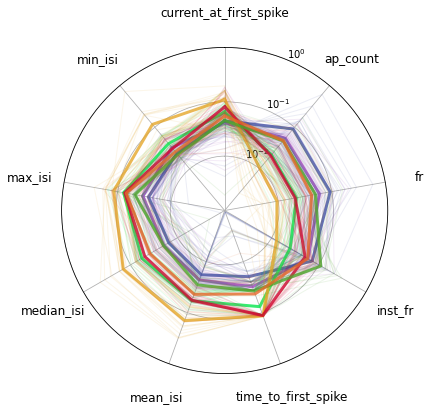

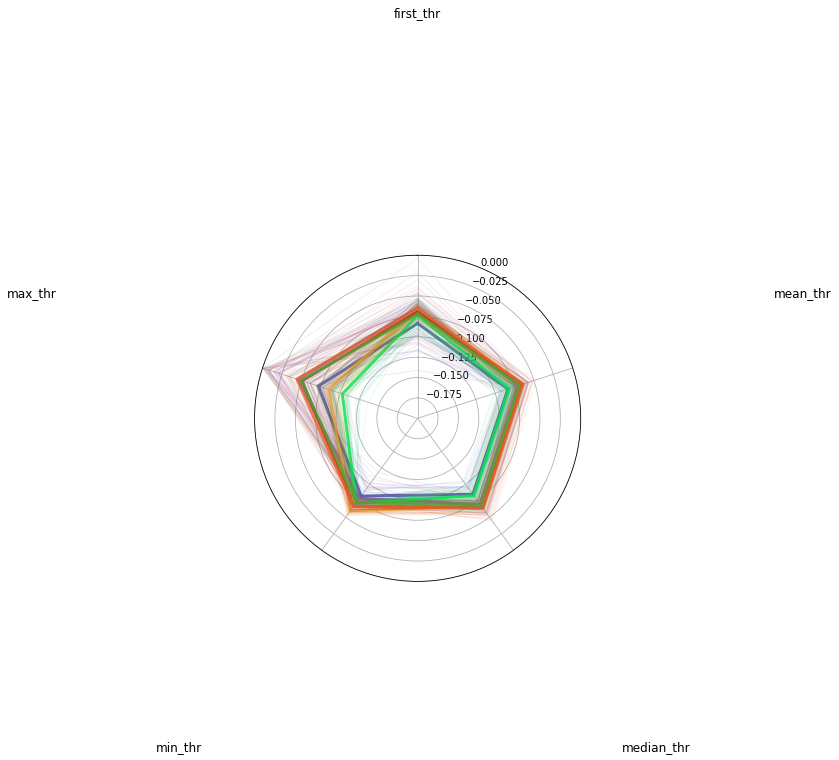

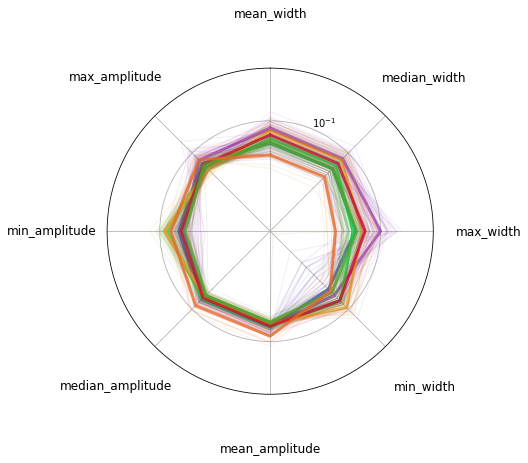

In [18]:
plot_radar(ephys_exc[ephys_exc.columns[:-6]],cols_spikes,ephys_exc['labels_ephys'],lims = (1e-3,1e0) ,palette=coherence_colors,save=True,savepath=savepath+'Exc_FN_spikes_radar.pdf')
plot_radar(ephys_exc[ephys_exc.columns[:-6]],cols_thrs,ephys_exc['labels_ephys']  ,lims = (-0.2,0.0) ,palette=coherence_colors,logscale = False,plot_neg_log=False,save=True,savepath=savepath+'Exc_FN_thrs_radar.pdf')
plot_radar(ephys_exc[ephys_exc.columns[:-6]],cols_wf,ephys_exc['labels_ephys']    ,lims = (1e-2,3e-1),palette=coherence_colors,save=True,savepath=savepath+'Exc_FN_wave_radar.pdf')

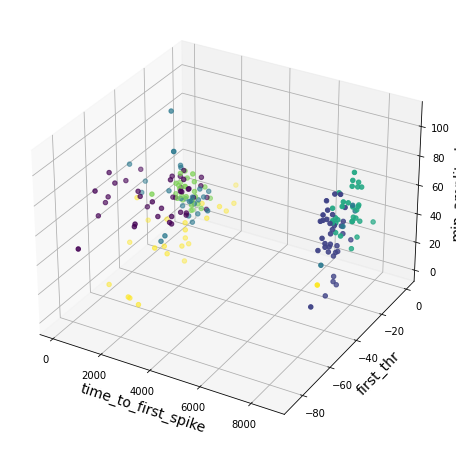

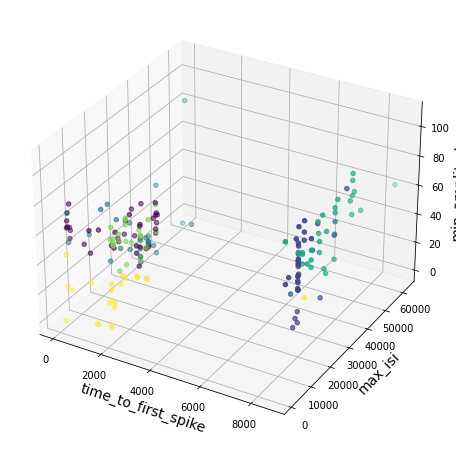

In [18]:
# %matplotlib ipympl =False

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(projection='3d')

ax.scatter(ephys_exc.time_to_first_spike,ephys_exc.first_thr,ephys_exc.min_amplitude,c=ephys_exc.labels_ephys)
ax.tight_layout=True
ax.set_xlabel('time_to_first_spike',fontsize=14)
ax.set_ylabel('first_thr',fontsize=14)
ax.set_zlabel('min_amplitude',fontsize=14)
plt.show()

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(projection='3d')

ax.scatter(ephys_exc.time_to_first_spike,ephys_exc.max_isi,ephys_exc.min_amplitude,c=ephys_exc.labels_ephys)
ax.tight_layout=True
ax.set_xlabel('time_to_first_spike',fontsize=14)
ax.set_ylabel('max_isi',fontsize=14)
ax.set_zlabel('min_amplitude',fontsize=14)
plt.show()

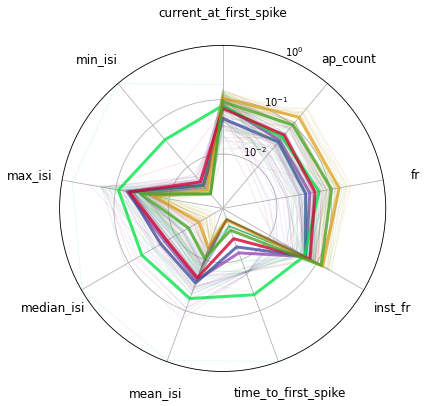

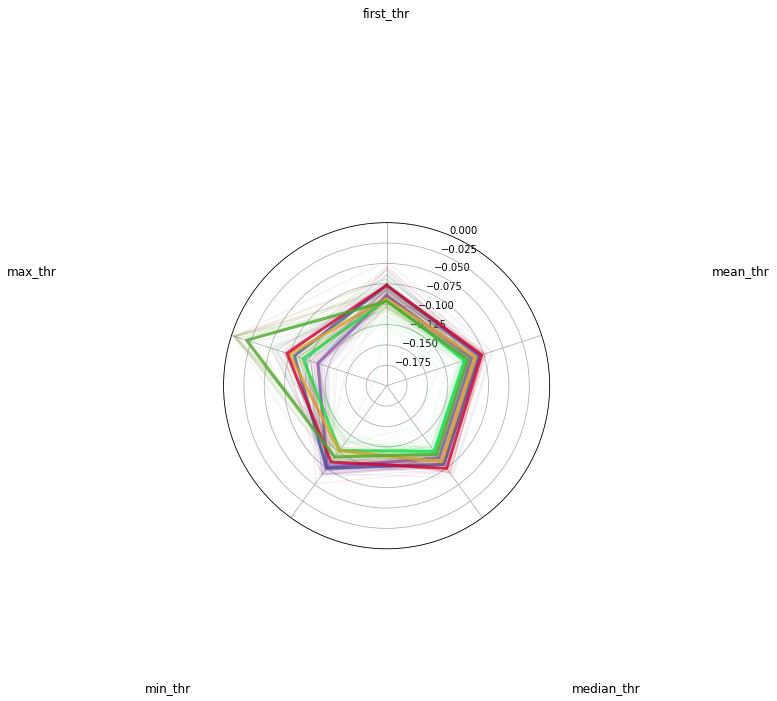

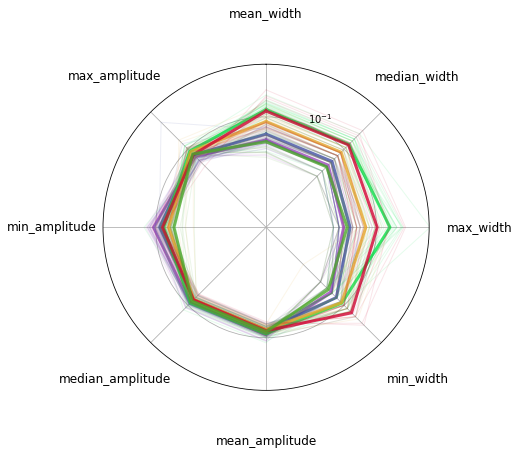

In [19]:
plot_radar(ephys_inh[ephys_inh.columns[:-6]],cols_spikes,ephys_inh['labels_ephys'],palette=coherence_colors,lims = (1e-3,1e0),save=True,savepath=savepath+'INH_FN_spikes_radar.pdf')
plot_radar(ephys_inh[ephys_inh.columns[:-6]],cols_thrs,ephys_inh['labels_ephys']  ,palette=coherence_colors,lims = (-0.2,0.0),logscale = False,plot_neg_log=False,save=True,savepath=savepath+'INH_FN_thrs_radar.pdf')
plot_radar(ephys_inh[ephys_inh.columns[:-6]],cols_wf,ephys_inh['labels_ephys']    ,palette=coherence_colors,lims = (1e-2,3e-1),save=True,savepath=savepath+'INH_FN_wave_radar.pdf')

Text(0.5, 0, 'ap_count')

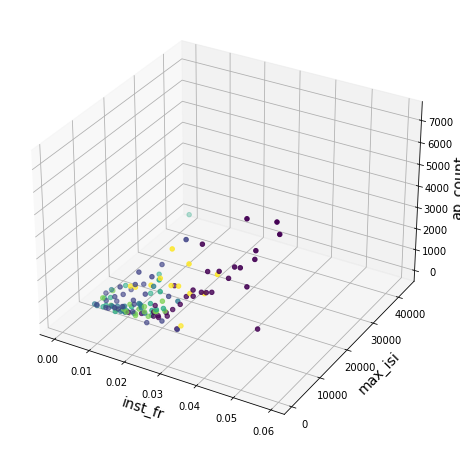

In [20]:

fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(projection='3d')
ax.tight_layout=True

ax.scatter(ephys_inh.inst_fr,ephys_inh.max_isi,ephys_inh.ap_count,c=ephys_inh.labels_ephys)
ax.set_xlabel('inst_fr',fontsize=14)
ax.set_ylabel('max_isi',fontsize=14)
ax.set_zlabel('ap_count',fontsize=14)


In [69]:
waves_exc = data_wave_FN_acsf[data_wave_FN_acsf.exp_name.isin(ephys_exc.exp_name)]
waves_exc = waves_exc.drop_duplicates('exp_name')
waves_exc['labels_ephys'] = np.array(ephys_exc.labels_ephys)
waves_inh = data_wave_FN_acsf[data_wave_FN_acsf.exp_name.isin(ephys_inh.exp_name)]
waves_inh = waves_inh.drop_duplicates('exp_name')
waves_inh['labels_ephys'] = np.array(ephys_inh.labels_ephys)


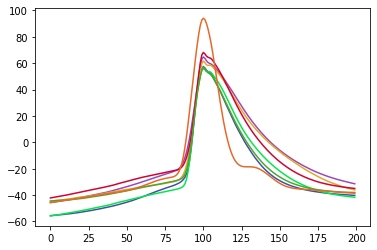

In [70]:
for i in set(waves_exc.labels_ephys):
    plt.plot(np.mean(np.vstack(waves_exc[waves_exc.labels_ephys==i]['waveform'].to_numpy()),axis=0),c=coherence_colors[i])
    # plt.show()
plt.savefig(savepath+'exc_waves_mean.pdf',dpi=200)

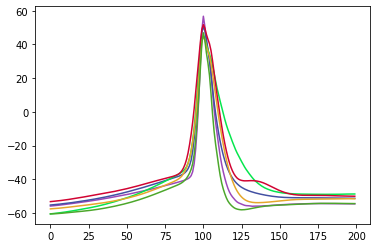

In [22]:
for i in set(waves_inh.labels_ephys):
    plt.plot(np.mean(np.vstack(waves_inh[waves_inh.labels_ephys==i]['waveform'].to_numpy()),axis=0),c=coherence_colors[i])
    # plt.show()
plt.savefig(savepath+'inh_waves_mean.pdf',dpi=200)    

## Biophysical

In [110]:
def return_name_date_exp_fn(string):

  if 'NC' in string:
    string_broken = string.split('_')
    name = string_broken[0]
    date = string_broken[1]
    exp = string_broken[-1]
    year = date[:2]
    month = date[2:4]

    if month[0] =='0':
      month = month[1]
    day = date[4:]
    if day[0] =='0':
      day = day[1]
    date = day+month+year  
    return name+'_'+date+'_'+exp 
  elif 'xuan' in string:
    broken_str = string.split('_')
    name = broken_str[0]
    date = broken_str[1].replace('-','')
    exp =  broken_str[2]
    return name+'_'+date+'_'+exp
  elif 'asli' in string:
    broken_str = string.split('_')
    name = broken_str[0]
    date = broken_str[1]
    date = date.replace('-','')
    exp =  broken_str[2]
    return name+'_'+date+'_'+exp    
  elif 'Payam' in string or 'payam' in string :
    broken_str = string.split('_')
    name = broken_str[0].lower()
    date = broken_str[1].split('-')
    exp =  broken_str[2]
    day = date[0]
    month = date[1]
    year = date[2]
    if day[0] =='0':
      day=day[1]
    date = day+month+year  
    return name+'_'+date+'_'+exp

In [114]:
df = pd.read_csv('D:/Biophysical_cluster/cluster_params_rect_filt.csv')
df.exp_name = df.exp_name.apply(return_name_date_exp_fn)
df = df[~df.exp_name.isin(discarded_exps)]
df = df[df.columns[1:]]
df_acsf = df[df.cond.isin(['ACSF','aCSF','aCSF_BIC'])]
df_acsf = df_acsf[df_acsf.trial==0]
df_acsf['labels_wave']=binarize_EI_labels(labels_wave,[1,2,3,6,7])

# np.unique(df_acsf.labels_wave,return_counts=True)

<Axes: >

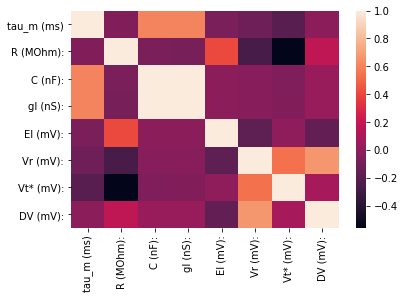

In [76]:
sns.heatmap(df[[ 'tau_m (ms)', 'R (MOhm):','C (nF):', 'gl (nS):', 'El (mV):', 'Vr (mV):', 'Vt* (mV):', 'DV (mV):',]].corr())

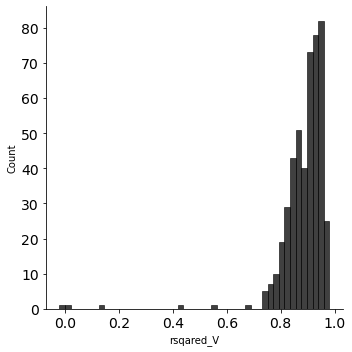

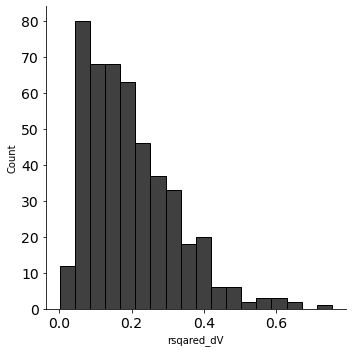

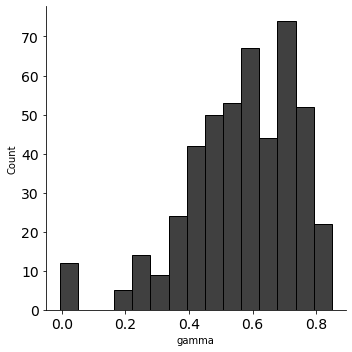

In [112]:
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
sns.displot(df_acsf['rsqared_V'],color='black')

plt.savefig(savepath+'rsquaredV_dist.pdf',dpi=200)
sns.displot(df_acsf['rsqared_dV'],color='black')
plt.savefig(savepath+'rsquareddV_dist.pdf',dpi=200)
sns.displot(df_acsf['gamma'],color='black')
plt.savefig(savepath+'gamma_dist.pdf',dpi=200)


In [115]:
df_biophys_exc = df_acsf[df_acsf.labels_wave == 1]
df_biophys_inh = df_acsf[df_acsf.labels_wave == 0]


In [116]:
df_biophys_exc = df_biophys_exc[df_biophys_exc.rsqared_V>0.7]
df_biophys_inh = df_biophys_inh[df_biophys_inh.rsqared_V>0.7]


feat_cols_bio =  df_biophys_inh.columns[:-7]


0.0

0.5

1.0

1.5

2.0

2.5

3.0

3.5

4.0

4.5

5.0

0.0

0.5

1.0

1.5

2.0

2.5

3.0

3.5

4.0

4.5

5.0


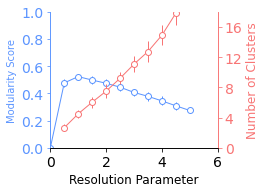

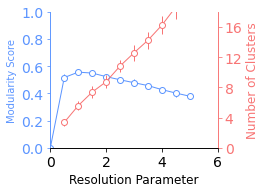

In [45]:

data_umap_scaler = StandardScaler()

find_optimum_res(data_umap_scaler.fit_transform(normalize(df_biophys_inh[feat_cols_bio])),save=True,savepath=savepath+'cluster_stability_bio_inh.pdf')
find_optimum_res(data_umap_scaler.fit_transform(normalize(df_biophys_exc[feat_cols_bio])),save=True,savepath=savepath+'cluster_stability_bio_exc.pdf')


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


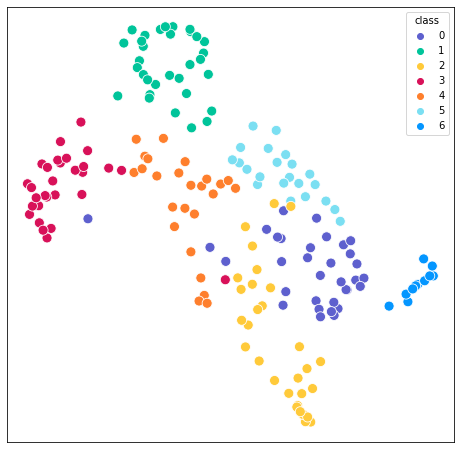

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


6


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


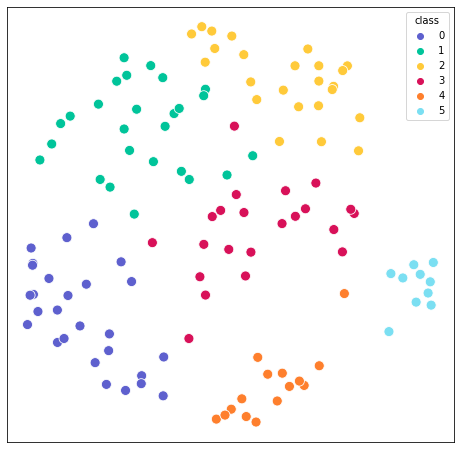

In [117]:
cols_bio = [ 'gl (nS):','C (nF):',  'El (mV):', 'Vr (mV):', 'Vt* (mV):', 'DV (mV):',]
bio_phys_exc = normalize(np.vstack(df_biophys_exc[cols_bio].to_numpy()),axis=0)
lables_bio_exc,mapper,reducer = plot_UMAP_clusters_single(bio_phys_exc,
                          20,
                          0.1,
                          random_state =30,
                          res_louvain = 1.,
                          c_list =CUSTOM_PAL_SORT_3,
                          size=100,
                          norm=False,
                          save =False,
                          savepath = savepath+'exc_bio_cluster.pdf'
                        #   title='UMAP+Louvain for biophysics'
                          )

bio_phys_inh = normalize(np.vstack(df_biophys_inh[cols_bio].to_numpy()),axis=0)
lables_bio_inh,mapper,reducer = plot_UMAP_clusters_single(bio_phys_inh,
                          20,
                          0.1,
                          random_state =30,
                          res_louvain = 1.,
                          c_list =CUSTOM_PAL_SORT_3,
                          size=100,
                          norm=False,
                          save =False,
                          savepath = savepath+'inh_bio_cluster.pdf'
                          )
df_biophys_exc['lables_bio'] = lables_bio_exc
df_biophys_inh['lables_bio'] = lables_bio_inh

In [38]:
with open("C:/Users/Nishant Joshi/Model_fitting/GIFFittingToolbox/src/examples/cluster_stability/cluster_stablity_biophys_E1.pkl",'rb') as f:
    clust_biophys_E = pickle.load(f) 

with open("C:/Users/Nishant Joshi/Model_fitting/GIFFittingToolbox/src/examples/cluster_stability/cluster_stablity_biophys_I1.pkl",'rb') as f:
    clust_biophys_I = pickle.load(f) 

with open("C:/Users/Nishant Joshi/Model_fitting/GIFFittingToolbox/src/examples/cluster_stability/cluster_stablity_ephys_E1.pkl",'rb') as f:
    clust_ephys_E = pickle.load(f)     

with open("C:/Users/Nishant Joshi/Model_fitting/GIFFittingToolbox/src/examples/cluster_stability/cluster_stablity_ephys_I1.pkl",'rb') as f:
    clust_ephys_I = pickle.load(f)     


        

In [38]:

def plot_clust_res_temp(all_data,pallete,save=True,savepath=None):
    f, ax1 = plt.subplots(figsize=[10,8])
    cols = list(all_data.keys())
    for num, feat in enumerate(all_data.keys()):
        modularity_dict, n_clusts_dict = all_data[feat].values()
        resolution_list = np.linspace(0,5,11)

        avg_n_clusts = []
        for k in list(n_clusts_dict.keys()):
            avg_n_clusts.append(np.mean(n_clusts_dict[k]))
            
        std_n_clusts = []
        for k in list(n_clusts_dict.keys()):
            std_n_clusts.append(np.std(n_clusts_dict[k]))
            
        std_modularity = []
        for k in list(modularity_dict.keys()):
            std_modularity.append(np.std(modularity_dict[k]))
            
        avg_modularity = []
        for k in list(modularity_dict.keys()):
            avg_modularity.append(np.mean(modularity_dict[k]))


        ax1.errorbar(resolution_list,avg_modularity,yerr=std_modularity,
                    marker='o', fillstyle='full', markerfacecolor='w', 
                    linewidth=1, markeredgewidth=1,c=pallete[num])
        ax1.set_ylabel('Modularity Score')
        ax1.set_xlabel('Resolution Parameter',fontsize=12)
        ax1.set_xlim([0,5])
        ax1.set_xticks([0,2,4,6])
        ax1.yaxis.label.set_color('#5c95ff')
        ax1.tick_params(axis='y',colors='#5c95ff')
        ax1.set_ylim(0,1.0)
        ax1.set_yticks([0,0.2,0.4,0.6,0.8,1.0])
        # ax1.set_yticklabels([0.0,'',0.2,'',0.4,'',0.6,'',0.8,'',1.0],fontsize=12)
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_color('#f87575')
        ax1.spines['left'].set_color('#5c95ff')

        ax2 = ax1.twinx()
        ax2.errorbar(resolution_list[1:],avg_n_clusts[1:],yerr=std_n_clusts[1:],c=pallete[num], marker='o', fillstyle='full', markerfacecolor='w', linewidth=1, markeredgewidth=1)
        ax2.set_ylabel('Number of Clusters',fontsize=12,c='#f87575')
        # ax2.spines['left'].set_color('b')
        ax2.tick_params(axis='y',colors='#f87575')
        ax2.set_ylim([0,22])
        ax2.set_yticks([0,4,8,12,16,18,20]);
        ax2.spines['top'].set_visible(False)
        ax2.spines['right'].set_color('#f87575')
        ax2.spines['left'].set_color('#5c95ff')

    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current ax1is
    ax1.legend(cols,loc='center left', bbox_to_anchor=(1.1, 0.5),fontsize=12)

    if save:
        plt.savefig(savepath,dpi=200)
    else:
        plt.show()


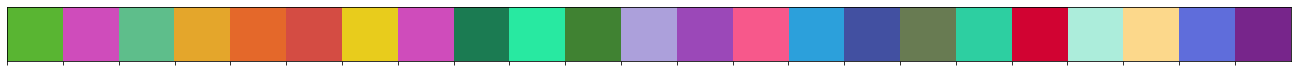

In [40]:
coherence_colors_temp = [
 [0.351, 0.712, 0.198],
 [0.812, 0.3, 0.734],
 [0.369, 0.749, 0.549],
 [0.898, 0.654, 0.169],
 [0.898, 0.41, 0.165],
 [0.834, 0.3, 0.265],
 [0.912, 0.8, 0.112],
 [0.812, 0.3, 0.734],
 [0.109, 0.483, 0.324],
 [0.159, 0.914, 0.635],
 [0.251, 0.512, 0.198],
 [0.676, 0.631, 0.859],
 [0.609, 0.283, 0.724],
 [0.969, 0.349, 0.549],
 [0.176, 0.631, 0.859],
 [0.259, 0.314, 0.635],
 [0.409, 0.483, 0.324],
 [0.179, 0.814, 0.635],
 [0.821, 0.012, 0.198],
 [0.676, 0.931, 0.859],
 [0.989, 0.849, 0.549],
 [0.376, 0.431, 0.859],
 [0.469, 0.149, 0.549]]
 
sns.palplot(coherence_colors_temp)

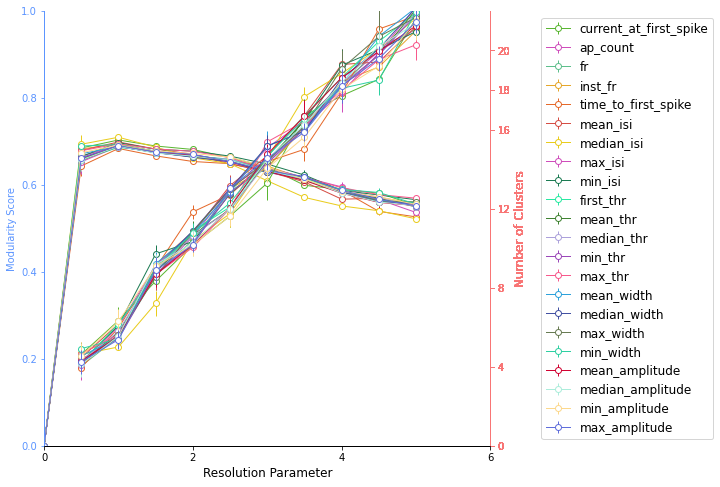

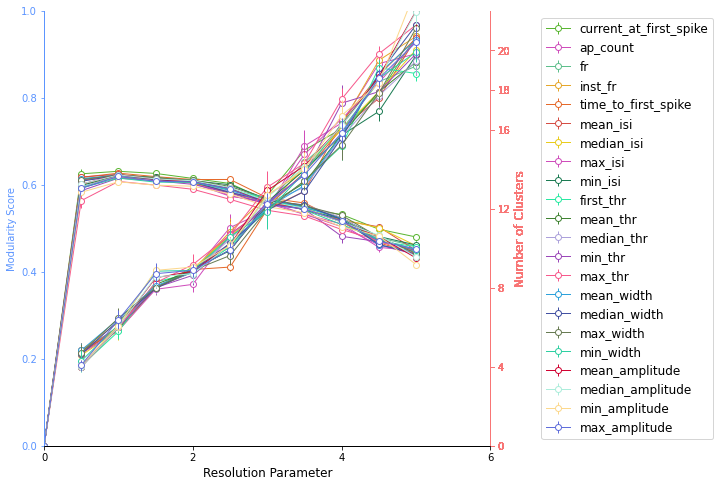

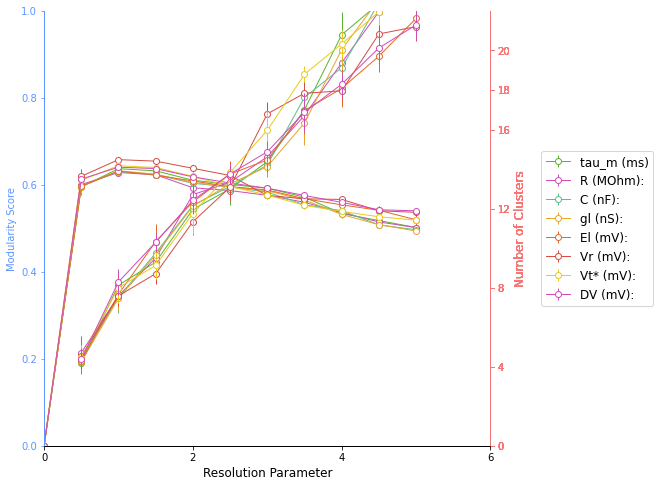

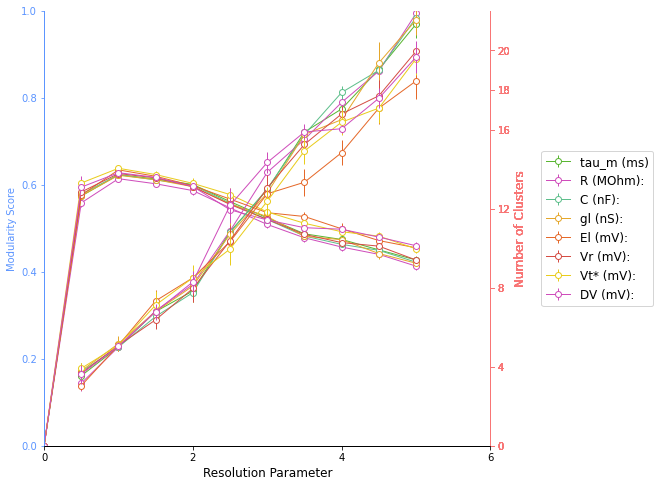

In [41]:
# clust_ephys_E
plot_clust_res_temp(clust_ephys_E,  coherence_colors_temp,save=True,savepath=savepath+'exc_ephys_cluster_stability_exclustion.pdf')
plot_clust_res_temp(clust_ephys_I,  coherence_colors_temp,save=True,savepath=savepath+'inh_ephys_cluster_stability_exclustion.pdf')
plot_clust_res_temp(clust_biophys_E,coherence_colors_temp,save=True,savepath=savepath+'exc_bio_cluster_stability_exclustion.pdf')
plot_clust_res_temp(clust_biophys_I,coherence_colors_temp,save=True,savepath=savepath+'inh_bio_cluster_stability_exclustion.pdf')


In [56]:
df_biophys_exc[cols_bio[3]][df_biophys_exc[cols_bio[3]]>0]

443    5.814611
802    0.282609
Name: Vr (mV):, dtype: float64

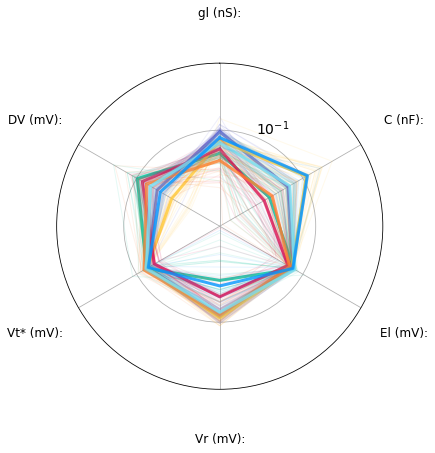

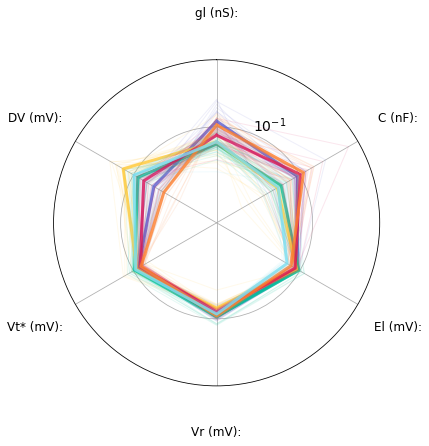

In [80]:
plot_radar(np.abs(df_biophys_exc[cols_bio]),cols_bio,lables_bio_exc,lims=(1e-2,5e-1),logscale=True,plot_neg_log=False,palette= CUSTOM_PAL_SORT_3,save=True,savepath=savepath+'exc_bio_radar.pdf')
plot_radar(np.abs(df_biophys_inh[cols_bio]),cols_bio,lables_bio_inh,lims=(1e-2,5e-1),logscale=True,plot_neg_log=False,palette= CUSTOM_PAL_SORT_3,save=True,savepath=savepath+'inh_bio_radar.pdf')

## Spike Triggered Average

In [118]:
df_sta = pd.read_pickle('D:/CurrentClamp/all_stas_hidden_spikes_computed.pkl')
df_sta.trial = df_sta.trial.apply(int)
df_sta = df_sta[~df_sta.exp_name.isin(discarded_exps)]
df_sta_acsf = df_sta[df_sta.cond.isin(['acsf','acsf_bic'])]

df_sta_acsf = df_sta_acsf[df_sta_acsf.exp_name.isin(set(data_wave_FN_acsf.exp_name))]
df_sta_acsf = df_sta_acsf[df_sta_acsf.trial==0]



In [119]:
df_sta_acsf['labels_wave'] =labels_wave 
df_sta_acsf_exc = df_sta_acsf[df_sta_acsf.labels_wave.isin([1,2,3,6,7])]
df_sta_acsf_inh = df_sta_acsf[df_sta_acsf.labels_wave.isin([0,4,5])]


0.0

0.5

1.0

1.5

2.0

2.5

3.0

3.5

4.0

4.5

5.0

0.0

0.5

1.0

1.5

2.0

2.5

3.0

3.5

4.0

4.5

5.0


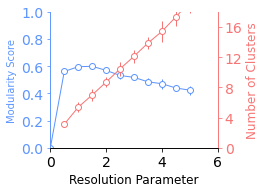

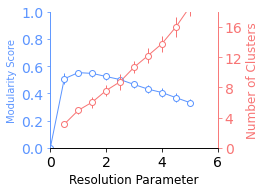

In [64]:
find_optimum_res(np.vstack(df_sta_acsf_exc['sta'].to_numpy()),save=True,savepath=savepath+'clsuter_stability_sta_exc.pdf')
find_optimum_res(np.vstack(df_sta_acsf_inh['sta'].to_numpy()),save=True,savepath=savepath+'clsuter_stability_sta_inh.pdf')

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


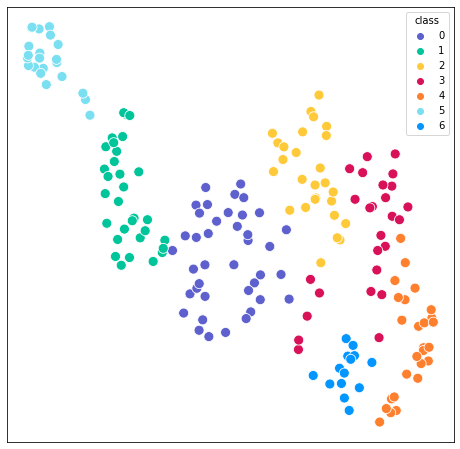

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


8


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


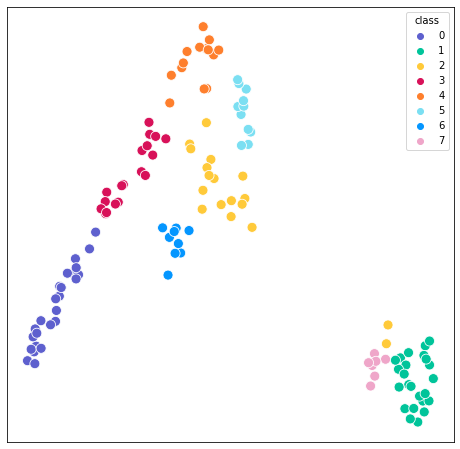

<ipython-input-120-e7f3c6953a7d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sta_acsf_exc['labels_sta'] =labels_sta_exc
<ipython-input-120-e7f3c6953a7d>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sta_acsf_inh['labels_sta'] =labels_sta_inh


In [120]:
sta_exc = normalize(np.vstack(df_sta_acsf_exc['sta'].to_numpy()))
labels_sta_exc,mapper,reducer = plot_UMAP_clusters_single(sta_exc,
                          20,
                          0.1,
                          random_state =30,
                          res_louvain = 1.,
                          c_list =CUSTOM_PAL_SORT_3,
                        #   title='UMAP+Louvain for waveforms'
                          norm = False,
                          size= 100,
                          save=True,
                          savepath=savepath+'sta_cluster_exc.pdf'
                          )

sta_inh = normalize(np.vstack(df_sta_acsf_inh['sta'].to_numpy()))
labels_sta_inh,mapper,reducer = plot_UMAP_clusters_single(sta_inh,
                          20,
                          0.1,
                          random_state =30,
                          res_louvain = 1.,
                          c_list =CUSTOM_PAL_SORT_3,
                        #   title='UMAP+Louvain for waveforms'
                          norm = False,
                          size= 100,
                          save=True,
                          savepath=savepath+'sta_cluster_inh.pdf'
                          )

df_sta_acsf_exc['labels_sta'] =labels_sta_exc
df_sta_acsf_inh['labels_sta'] =labels_sta_inh

In [84]:
stas = np.vstack(df_sta_acsf_exc[df_sta_acsf_exc.labels_sta==1]['sta'])
exps = df_sta_acsf_exc[df_sta_acsf_exc.labels_sta==1]['exp_name']



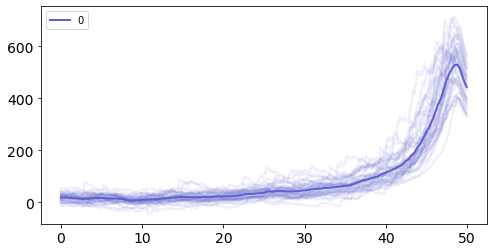

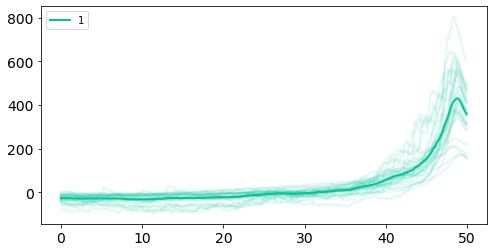

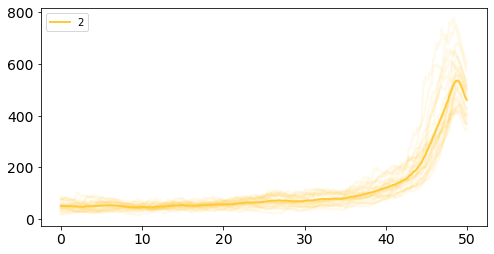

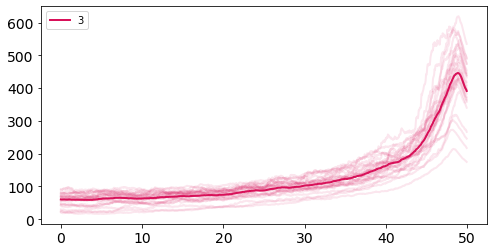

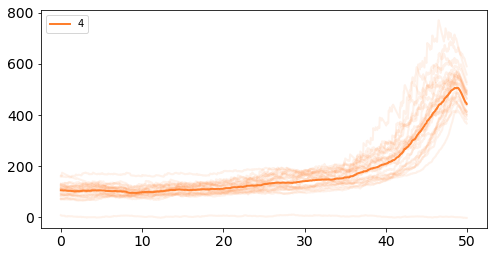

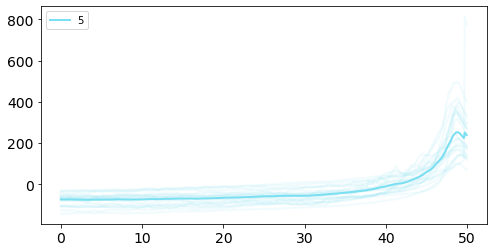

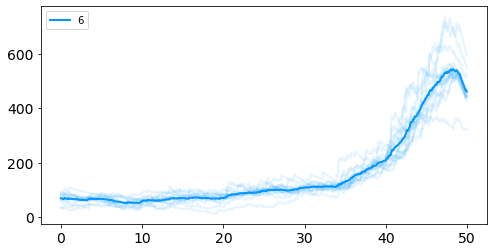

In [85]:
for i in set(df_sta_acsf_exc.labels_sta):
    fig,ax = plt.subplots(figsize=[8,4])
    plt.plot(np.arange(0,50,1/20),np.vstack(df_sta_acsf_exc[df_sta_acsf_exc.labels_sta==i]['sta']).T[50*20:],c=CUSTOM_PAL_SORT_3[i],linewidth=2,alpha=0.1)
    plt.plot(np.arange(0,50,1/20),np.mean(np.vstack(df_sta_acsf_exc[df_sta_acsf_exc.labels_sta==i]['sta']).T,axis=1)[50*20:],c=CUSTOM_PAL_SORT_3[i],linewidth=2,label=i)
    plt.legend()
    plt.show()

# for i in set(df_sta_acsf_inh.labels_sta):
#     plt.plot(np.arange(0,50,1/20),np.mean(np.vstack(df_sta_acsf_inh[df_sta_acsf_inh.labels_sta==i]['sta']).T,axis=1)[50*20:],c=coherence_colors[i],linewidth=2,label=i)
# plt.legend()    
# plt.show()

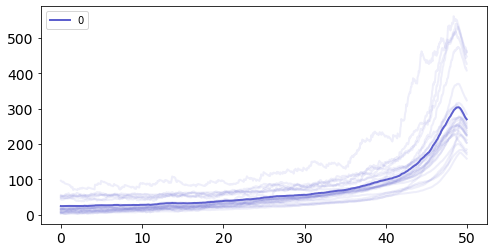

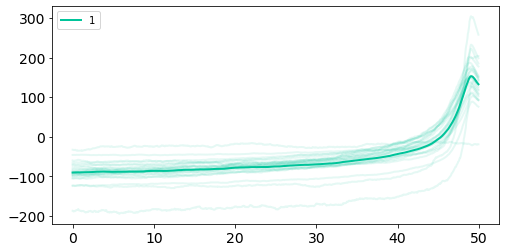

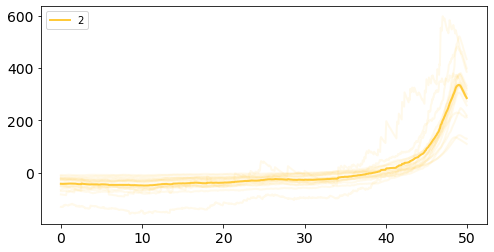

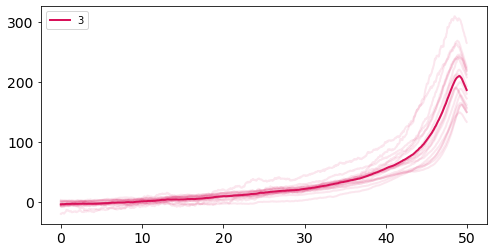

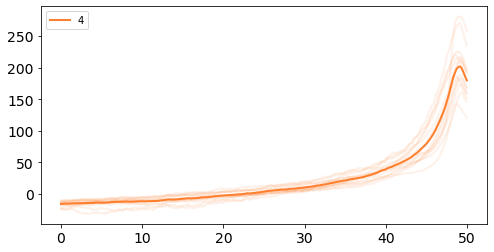

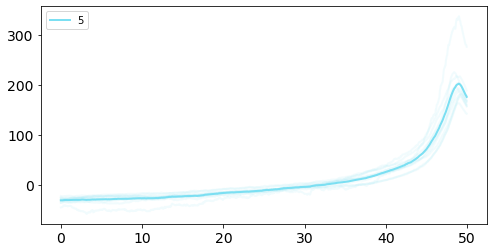

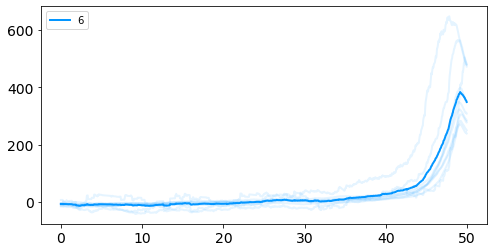

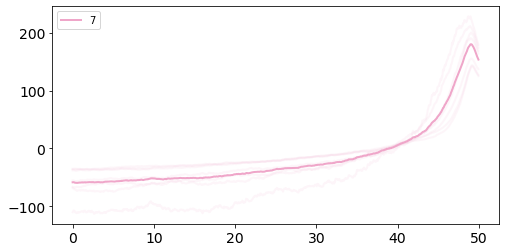

In [86]:
for i in set(df_sta_acsf_inh.labels_sta):
    fig,ax = plt.subplots(figsize=[8,4])
    plt.plot(np.arange(0,50,1/20),np.vstack(df_sta_acsf_inh[df_sta_acsf_inh.labels_sta==i]['sta']).T[50*20:],c=CUSTOM_PAL_SORT_3[i],linewidth=2,alpha=0.1)
    plt.plot(np.arange(0,50,1/20),np.mean(np.vstack(df_sta_acsf_inh[df_sta_acsf_inh.labels_sta==i]['sta']).T,axis=1)[50*20:],c=CUSTOM_PAL_SORT_3[i],linewidth=2,label=i)
    plt.legend()
    plt.show()

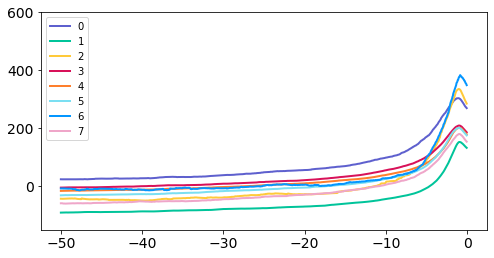

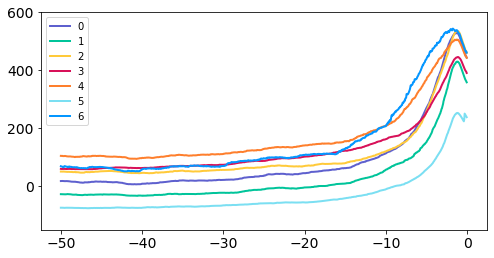

In [87]:
fig,ax = plt.subplots(figsize=[8,4])
for i in set(df_sta_acsf_inh.labels_sta):
    # plt.plot(np.arange(0,50,1/20),np.vstack(df_sta_acsf_inh[df_sta_acsf_inh.labels_sta==i]['sta']).T[50*20:],c=coherence_colors[i],linewidth=2,alpha=0.1)
    plt.plot(np.arange(-50,0,1/20),np.mean(np.vstack(df_sta_acsf_inh[df_sta_acsf_inh.labels_sta==i]['sta']).T,axis=1)[50*20:],c=CUSTOM_PAL_SORT_3[i],linewidth=2,label=i)
plt.ylim(-150,600)
plt.legend()
plt.savefig(savepath+'sta_inh.pdf',dpi=200)
# plt.show()

fig,ax = plt.subplots(figsize=[8,4])
for i in set(df_sta_acsf_exc.labels_sta):
    # plt.plot(np.arange(0,50,1/20),np.vstack(df_sta_acsf_exc[df_sta_acsf_exc.labels_sta==i]['sta']).T[50*20:],c=CUSTOM_PAL_SORT_3[i],linewidth=2,alpha=0.1)
    plt.plot(np.arange(-50,0,1/20),np.mean(np.vstack(df_sta_acsf_exc[df_sta_acsf_exc.labels_sta==i]['sta']).T,axis=1)[50*20:],c=CUSTOM_PAL_SORT_3[i],linewidth=2,label=i)
plt.ylim(-150,600)
plt.legend()
plt.savefig(savepath+'sta_exc.pdf',dpi=200)
# plt.show()

## Labels Matching 

In [121]:
import pandas as pd 
def return_confusion_matrix_temp(df1,df2,label1_name,label2_name,vmin=0,vmax=100,figsize =[12,5],shuffle = False,save=False,savepath=None,palette='BrBG_r'):
    np.random.seed(42)
    if shuffle:
        fig,ax1 = plt.subplots(figsize =figsize )
        df = pd.DataFrame(columns=['label1','label2'])
        # df['exp_name1'] = df1.exp_name
        # df['exp_name2'] = df2.exp_name
        
        label1 = list(df1[label1_name])
        np.random.shuffle(label1)
        label2 = list(df2[label2_name])
        np.random.shuffle(label2)

        df['label1_sh'] = label1
        df['label2_sh'] = label2

        df['label1'] = np.array(df1[label1_name]) 
        df['label2'] = np.array(df2[label2_name])

        mat_orig = np.zeros((len(set(df1[label1_name])),len(set(df2[label2_name]))))
        for i in np.unique(df.label1):
            data_ = np.unique(df[df.label1==i]['label2'],return_counts=True)
            mat_orig[i,data_[0]] =(data_[1]/np.sum(data_[1])) 

        mat_sh = np.zeros((len(set(df['label1_sh'])),len(set(df['label2_sh']))))
        mat_sh[:,:] = int(100/len(set(df2[label2_name])))
        # for i in np.unique(df.label1_sh):
        #     data_ = np.unique(df[df.label1_sh==i]['label2_sh'],return_counts=True)
        #     mat_sh[i,data_[0]] =(data_[1]/np.sum(data_[1]))*100 


        sns.heatmap(mat_orig,cmap=palette,annot=True,ax=ax1,vmin=vmin,vmax=vmax) 
        plt.xlabel(label1_name)
        plt.ylabel(label2_name)
        if save:
            plt.savefig(savepath,dpi=300)
        else:
            plt.show()

    else:
        df = pd.DataFrame(columns=['label1','label2'])
        # df['exp_name1'] = df1.exp_name
        # df['exp_name2'] = df2.exp_name
        df['label1'] = np.array(df1[label1_name])
        df['label2'] = np.array(df2[label2_name])

        mat = np.zeros((len(set(df1[label1_name])),len(set(df2[label2_name]))))

        for i in np.unique(df.label1):
            data_ = np.unique(df[df.label1==i]['label2'],return_counts=True)
            mat[i,data_[0]] =(data_[1]/np.sum(data_[1]))*100 

        sns.heatmap(mat,cmap=palette,annot=True,vmin=vmin,vmax=vmax) 


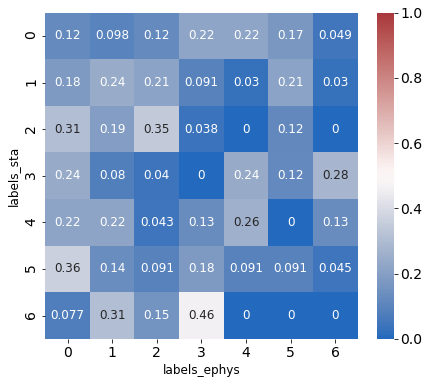

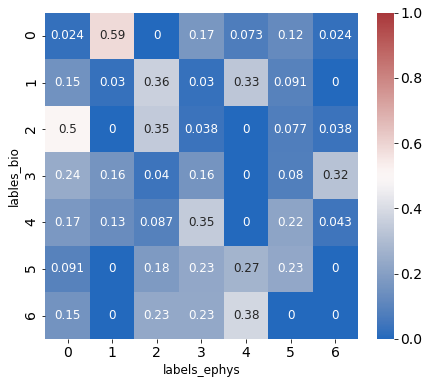

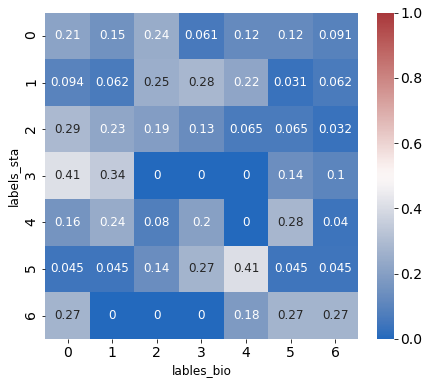

In [159]:
from plot_utils import * 

conf_df_exc_ephys = ephys_exc[ephys_exc.exp_name.isin(set(df_biophys_exc.exp_name))]
conf_df_exc_ephys =conf_df_exc_ephys.drop_duplicates('exp_name')
conf_df_exc_sta = df_sta_acsf_exc[df_sta_acsf_exc.exp_name.isin(set(df_biophys_exc.exp_name))]
conf_df_exc_bio = df_biophys_exc.drop_duplicates('exp_name')
plt.rcParams['font.size']=12
return_confusion_matrix_temp(conf_df_exc_ephys, conf_df_exc_sta, 'labels_ephys','labels_sta',palette='vlag',vmin=0,vmax=1,figsize=[7,6],shuffle=True,save=True,savepath=savepath+'exc_ephys_sta.pdf')
return_confusion_matrix_temp(conf_df_exc_ephys, conf_df_exc_bio, 'labels_ephys','lables_bio',palette='vlag',vmin=0,vmax=1,figsize=[7,6],shuffle=True,save=True,savepath=savepath+'exc_ephys_bio.pdf')
return_confusion_matrix_temp(conf_df_exc_bio  , conf_df_exc_sta, 'lables_bio'  ,'labels_sta',palette='vlag',vmin=0,vmax=1,figsize=[7,6],shuffle=True,save=True,savepath=savepath+'exc_bio_sta.pdf')

In [193]:
all = np.concatenate((np.concatenate((conf_df_exc_bio[cols_bio].to_numpy(),conf_df_exc_ephys[cols].to_numpy()),axis=1),np.vstack(conf_df_exc_sta['sta'])),axis=1)


(183, 2027)

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


7


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


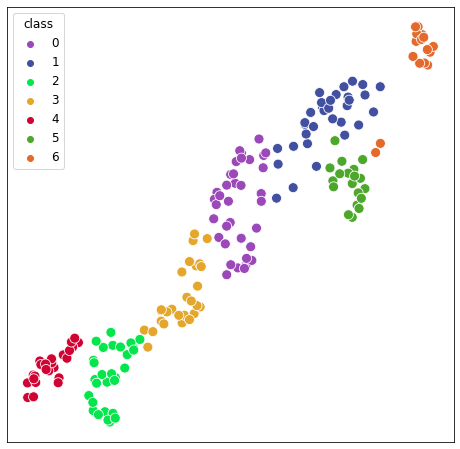

In [194]:
waves = normalize(all,axis=0)

labels_wave,mapper,reducer = plot_UMAP_clusters_single(waves,
                          20,
                          0.1,
                          random_state =42,
                          res_louvain = 1.,
                          c_list =coherence_colors,
                          norm=False,
                          save=False,
                          savepath = savepath+'wave_cluster.pdf',
                          size=100
                          )

In [166]:
conf_df_exc_bio

np.concatenate((conf_df_exc_bio.to_numpy(),conf_df_exc_ephys.to_numpy()),axis=0)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 17 and the array at index 1 has size 28

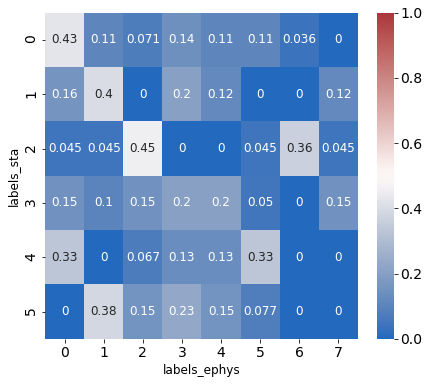

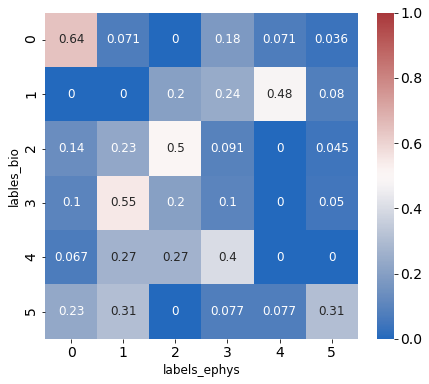

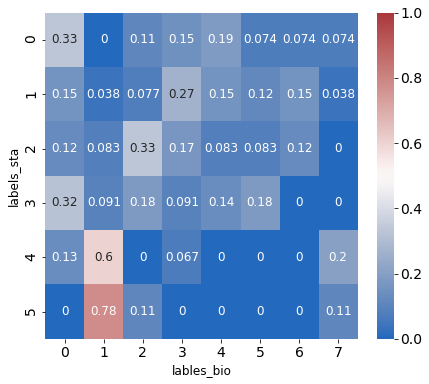

In [152]:
exps_in_common =   (set(ephys_inh.exp_name) & set(df_sta_acsf_inh.exp_name)) & set(df_biophys_inh.exp_name) 
plt.rcParams['font.size']=12

conf_df_inh_ephys = ephys_inh[ephys_inh.exp_name.isin(exps_in_common)]
conf_df_inh_sta = df_sta_acsf_inh[df_sta_acsf_inh.exp_name.isin(exps_in_common)]
conf_df_inh_sta = conf_df_inh_sta.drop_duplicates('exp_name')
conf_df_inh_bio = df_biophys_inh[df_biophys_inh.exp_name.isin(exps_in_common)]

return_confusion_matrix_temp(conf_df_inh_ephys, conf_df_inh_sta, 'labels_ephys','labels_sta',palette='vlag',vmin=0,vmax=1,figsize=[7,6],shuffle=True,save=True,savepath=savepath+'inh_ephys_sta.pdf')
return_confusion_matrix_temp(conf_df_inh_ephys, conf_df_inh_bio, 'labels_ephys','lables_bio',palette='vlag',vmin=0,vmax=1,figsize=[7,6],shuffle=True,save=True,savepath=savepath+'inh_ephys_bio.pdf')
return_confusion_matrix_temp(conf_df_inh_bio  , conf_df_inh_sta, 'lables_bio'  ,'labels_sta',palette='vlag',vmin=0,vmax=1,figsize=[7,6],shuffle=True,save=True,savepath=savepath+'inh_bio_sta.pdf')


In [221]:
conf_df_inh_ephys_sorted = conf_df_inh_ephys.sort_values('labels_ephys')
conf_df_inh_bio_sorted = conf_df_inh_bio.sort_values('lables_bio')
conf_df_inh_sta_sorted = conf_df_inh_sta.sort_values('labels_sta')


conf_df_exc_ephys_sorted = conf_df_exc_ephys.sort_values('labels_ephys')
conf_df_exc_bio_sorted = conf_df_exc_bio.sort_values('lables_bio')
conf_df_exc_sta_sorted = conf_df_exc_sta.sort_values('labels_sta')


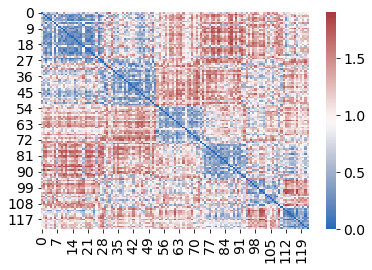

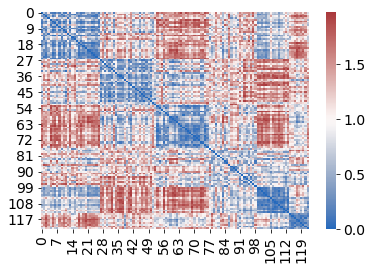

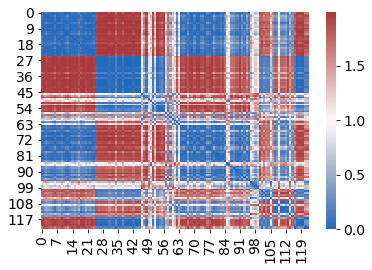

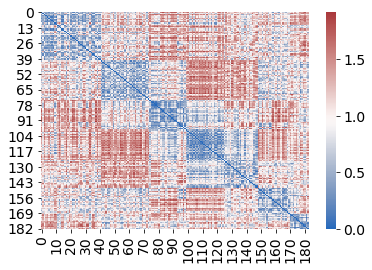

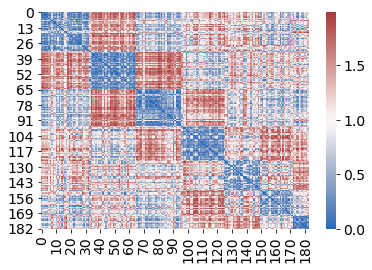

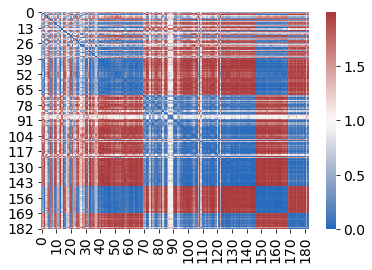

In [223]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

# Example data (replace these with your actual data)
# electrophysiological_data = 
# biophysical_data = 
# spike_triggered_average_data = 

# Step 1: Normalize the data
scaler = StandardScaler()
ephys_data_inh = scaler.fit_transform(conf_df_inh_ephys_sorted[cols])
bio_data_inh = scaler.fit_transform(conf_df_inh_bio_sorted[cols_bio])
sta_data_inh = scaler.fit_transform(np.vstack(conf_df_inh_sta_sorted['sta'].to_numpy()))

ephys_data_exc = scaler.fit_transform(conf_df_exc_ephys_sorted[cols])
bio_data_exc = scaler.fit_transform(conf_df_exc_bio_sorted[cols_bio])
sta_data_exc = scaler.fit_transform(np.vstack(conf_df_exc_sta_sorted['sta'].to_numpy()))


# Step 2: Calculate pairwise distances within each modality
def calculate_pairwise_distances(data, metric='cosine'):
    return squareform(pdist(data, metric)) , pdist(data, metric) 

electrophysiological_distances_mat_inh , electrophysiological_distances_inh = calculate_pairwise_distances(ephys_data_inh)
biophysical_distances_mat_inh,biophysical_distances_inh  = calculate_pairwise_distances(bio_data_inh)
sta_distance_mat_inh,sta_distance_inh = calculate_pairwise_distances(sta_data_inh)

electrophysiological_distances_mat_exc , electrophysiological_distances_exc = calculate_pairwise_distances(ephys_data_exc)
biophysical_distances_mat_exc,biophysical_distances_exc  = calculate_pairwise_distances(bio_data_exc)
sta_distance_mat_exc,sta_distance_exc = calculate_pairwise_distances(sta_data_exc)


sns.heatmap(electrophysiological_distances_mat_inh,cmap='vlag')
plt.show()
sns.heatmap(biophysical_distances_mat_inh,cmap='vlag')
plt.show()
sns.heatmap(sta_distance_mat_inh,cmap='vlag')
plt.show()


sns.heatmap(electrophysiological_distances_mat_exc,cmap='vlag')
plt.show()
sns.heatmap(biophysical_distances_mat_exc,cmap='vlag')
plt.show()
sns.heatmap(sta_distance_mat_exc,cmap='vlag')
plt.show()


In [199]:
from sklearn.cross_decomposition import CCA

# Assuming you want to compare 22D vs 2000D and 22D vs 8D
cca = CCA(n_components=2)
cca_22d_2000d = cca.fit(ephys_data, sta_data).transform(ephys_data, sta_data)
cca_22d_8d = cca.fit(ephys_data, bio_data).transform(ephys_data, bio_data)

# cca_22d_2000d and cca_22d_8d now contain the transformed data for comparison


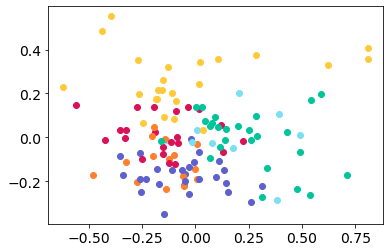

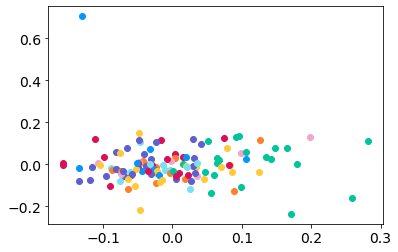

In [200]:
# plt.scatter(cca_22d_8d[0],cca_22d_8d[1])
for i,j in enumerate(conf_df_inh_bio.lables_bio):
    plt.scatter(cca_22d_8d[0][i,0],cca_22d_8d[0][i,1],c=CUSTOM_PAL_SORT_3[j])
plt.show()
for i,j in enumerate(conf_df_inh_sta.labels_sta):    
    plt.scatter(cca_22d_2000d[0][i,0],cca_22d_2000d[0][i,1],c=CUSTOM_PAL_SORT_3[j])
plt.show()    

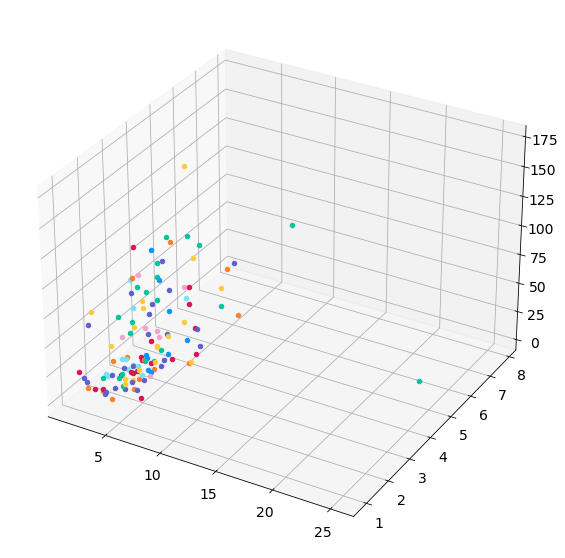

In [172]:
ax = plt.figure(figsize=[10,10]).add_subplot(projection='3d')
for i,j in enumerate(conf_df_inh_sta.labels_sta):
    ax.scatter(electrophysiological_distances[i] ,biophysical_distances[i] ,sta_distance[i],c=CUSTOM_PAL_SORT_3[j])

In [127]:
label_ephys_inh = list(conf_df_inh_ephys.labels_ephys)
label_sta_inh = list(conf_df_inh_sta.labels_sta)
label_bio_inh = list(conf_df_inh_bio.lables_bio)

df_labels_inh = pd.DataFrame({'label_ephys':list(label_ephys_inh),
                              'label_sta' :  list(label_sta_inh),
                              'label_bio' :  list(label_bio_inh),
                              'exp_name':    list(conf_df_inh_bio.exp_name)})
    

label_ephys_exc = list(conf_df_exc_ephys.labels_ephys)
label_sta_exc = list(conf_df_exc_sta.labels_sta)
label_bio_exc = list(conf_df_exc_bio.lables_bio)

df_labels_exc = pd.DataFrame({'label_ephys':list(label_ephys_exc),
                              'label_sta' :  list(label_sta_exc),
                              'label_bio' :  list(label_bio_exc),
                              'exp_name':    list(conf_df_exc_bio.exp_name)})
    


<Axes: >

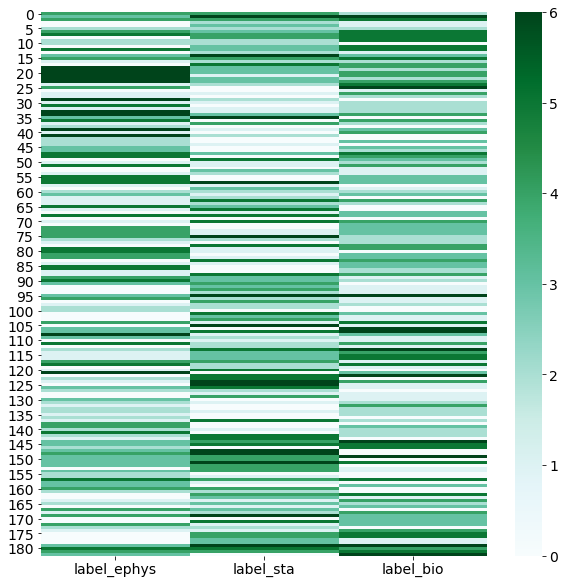

In [92]:
plt.figure(figsize=[10,10])
sns.heatmap(df_labels_exc[df_labels_exc.columns[:-1]],cmap='BuGn')

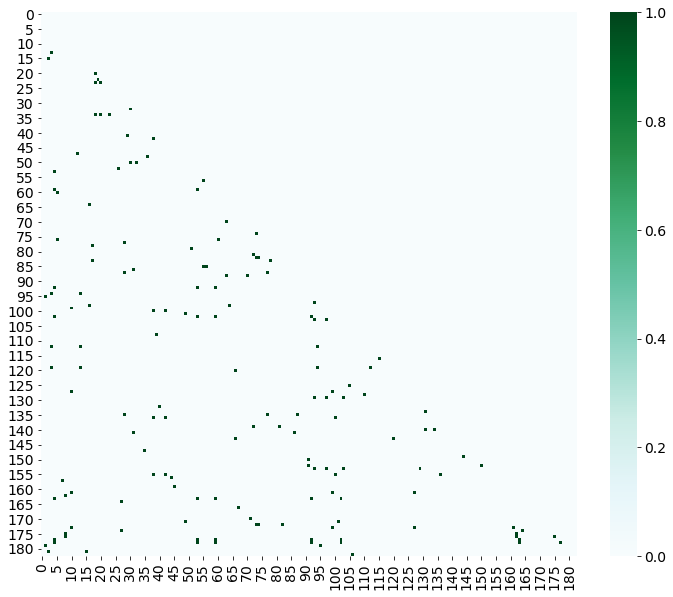

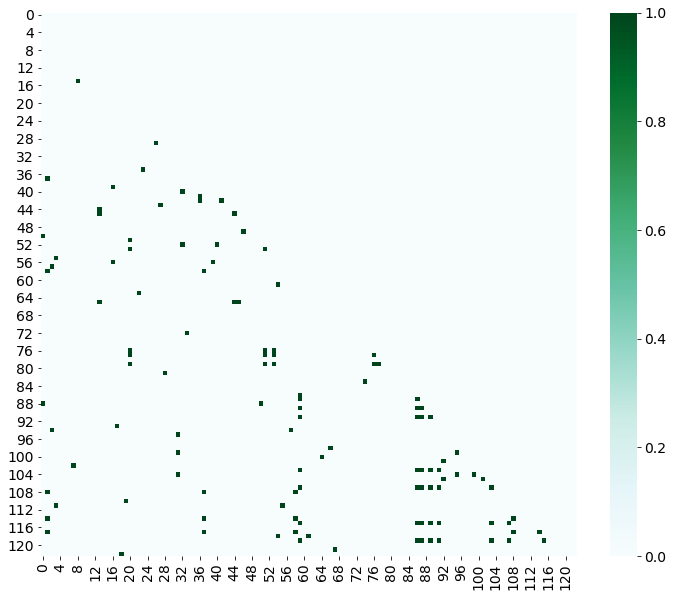

In [147]:
def co_association_matrix(labels):
    n = len(labels)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i>j:
                if i!=j:
                    if labels[i] == labels[j]:
                        matrix[i, j] = 1
    return matrix
mat1 = co_association_matrix(df_labels_exc['label_ephys'])
mat2 = co_association_matrix(df_labels_exc['label_bio'])
mat3 = co_association_matrix( df_labels_exc['label_sta'])
mat_exc = np.int32((mat1+mat2+mat3)/3)

plt.figure(figsize=[12,10])

sns.heatmap(mat_exc,cmap='BuGn')
plt.show()

mat1 = co_association_matrix(df_labels_inh['label_ephys'])
mat2 = co_association_matrix(df_labels_inh['label_bio'])
mat3 = co_association_matrix( df_labels_inh['label_sta'])
mat_inh = np.int32((mat1+mat2+mat3)/3)

plt.figure(figsize=[12,10])

sns.heatmap(mat_inh,cmap='BuGn')
plt.show()

In [148]:
np.sum(mat_exc,axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 2,
       2, 0, 0, 0, 3, 0, 2, 1, 0, 1, 2, 1, 2, 1, 4, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 3, 0, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0, 0, 1, 0, 2, 1, 3, 0, 0,
       1, 0, 1, 3, 3, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 2, 4,
       0, 4, 1, 1, 0, 1, 0, 3, 1, 5, 1, 0, 1, 0, 0, 0, 1, 2, 3, 4, 2, 2,
       3, 6, 7, 2, 0, 2, 1])

<Axes: >

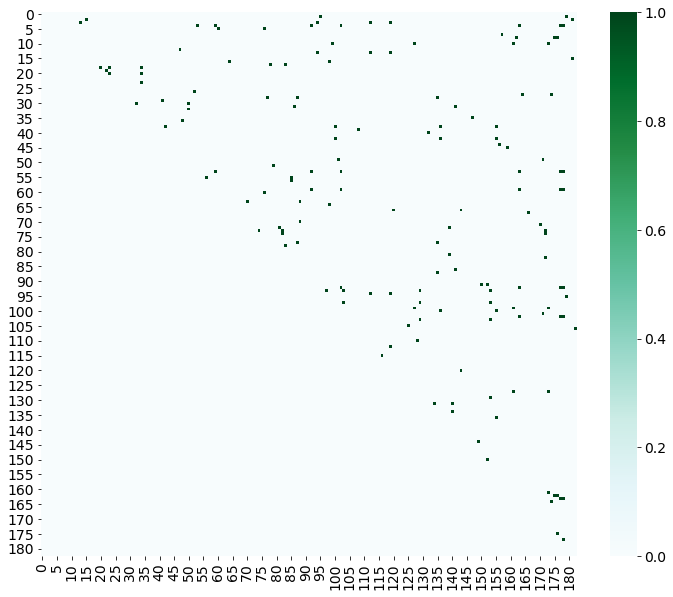

In [133]:
plt.figure(figsize=[12,10])
sns.heatmap(consensus,cmap='BuGn')

127

In [95]:
row_3,col_3 =np.where(consensus==3)
row_2,col_2 =np.where(consensus==2)

exps_consensus_3 = set(np.concatenate([df_labels_exc.exp_name[row_3],df_labels_exc.exp_name[col_3]]))
exps_consensus_2 = set(np.concatenate([df_labels_exc.exp_name[row_2],df_labels_exc.exp_name[col_2]]))

print(len(exps_consensus_3)/len(df_labels_exc))
print(len(exps_consensus_2)/len(df_labels_exc))


0.6939890710382514
0.9289617486338798


In [237]:
def mahalanobis(x=None, data=None, cov=None):
    x = np.array(x,dtype=np.float32)
    x_mu = x - np.mean(x,axis=0)
    if not cov:
        cov = np.cov(x.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()


cols_ephys = ['current_at_first_spike', 'ap_count', 'fr', 'inst_fr',
       'time_to_first_spike', 'mean_isi', 'median_isi', 'max_isi', 'min_isi',
       'first_thr', 'mean_thr', 'median_thr', 'min_thr', 'max_thr',
       'mean_width', 'median_width', 'max_width', 'min_width',
       'mean_amplitude', 'median_amplitude', 'min_amplitude', 'max_amplitude',]




exps_in_common =   (set(ephys_inh.exp_name) & set(df_sta_acsf_inh.exp_name)) & set(df_biophys_inh.exp_name) 

conf_df_inh_ephys = ephys_inh[ephys_inh.exp_name.isin(exps_in_common)]
conf_df_inh_sta = df_sta_acsf_inh[df_sta_acsf_inh.exp_name.isin(exps_in_common)]
conf_df_inh_sta = conf_df_inh_sta.drop_duplicates('exp_name')
conf_df_inh_bio = df_biophys_inh[df_biophys_inh.exp_name.isin(exps_in_common)]

m_dist_ephys  = mahalanobis(x= conf_df_inh_ephys[cols_ephys].values,data = conf_df_inh_ephys)
m_dist_sta    = mahalanobis(x= np.vstack(conf_df_inh_sta['sta'].values),data = conf_df_inh_sta)
m_dist_bio    = mahalanobis(x= np.vstack(conf_df_inh_bio[cols_bio].values),data = conf_df_inh_bio)



conf_df_inh_ephys['m_dist'] = m_dist_ephys

conf_df_inh_sta['m_dist'] = m_dist_sta

conf_df_inh_bio['m_dist'] = m_dist_bio


<ipython-input-237-1207e45187db>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conf_df_inh_ephys['m_dist'] = m_dist_ephys
<ipython-input-237-1207e45187db>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conf_df_inh_bio['m_dist'] = m_dist_bio


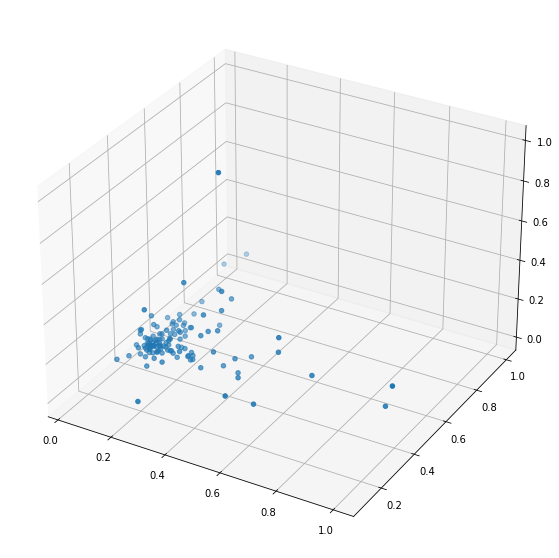

In [241]:
ax = plt.figure(figsize=[10,10]).add_subplot(projection='3d')
ax.scatter(conf_df_inh_ephys['m_dist']/np.max(conf_df_inh_ephys['m_dist']) ,conf_df_inh_sta['m_dist']/np.max(conf_df_inh_sta['m_dist']),conf_df_inh_bio['m_dist']/np.max(conf_df_inh_bio['m_dist']))

<Axes: >

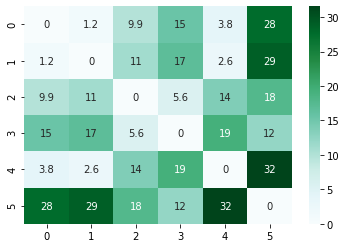

In [224]:
centers = []
for i in set(ephys_exc.labels_ephys):

    centers.append(np.mean(ephys_exc[ephys_exc.labels_ephys==i]['m_dist']))


inter_clus_dist = np.zeros((len(centers),len(centers)))
for i in range(len(centers)):
    for j in range(len(centers)):
        if i!=j:
            inter_clus_dist[i,j] = np.abs(centers[i]-centers[j])

inter_clus_dist = np.zeros((len(centers),len(centers)))
for i in range(len(centers)):
    for j in range(len(centers)):
        if i!=j:
            inter_clus_dist[i,j] = np.abs(centers[i]-centers[j])


sns.heatmap(inter_clus_dist,cmap='BuGn',annot=True)

<Axes: >

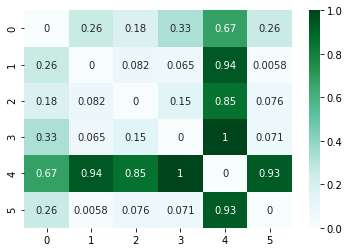

In [228]:
centers = []
for i in set(df_sta_acsf_exc.labels_sta):

    centers.append(np.mean(df_sta_acsf_exc[df_sta_acsf_exc.labels_sta==i]['m_dist']))


inter_clus_dist = np.zeros((len(centers),len(centers)))
for i in range(len(centers)):
    for j in range(len(centers)):
        if i!=j:
            inter_clus_dist[i,j] = np.abs(centers[i]-centers[j])

inter_clus_dist = np.zeros((len(centers),len(centers)))
for i in range(len(centers)):
    for j in range(len(centers)):
        if i!=j:
            inter_clus_dist[i,j] = np.abs(centers[i]-centers[j])


sns.heatmap(inter_clus_dist/np.max(inter_clus_dist),cmap='BuGn',annot=True)

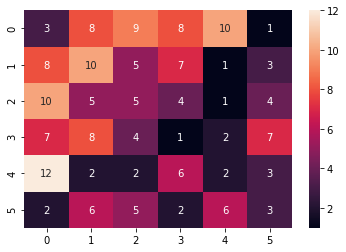

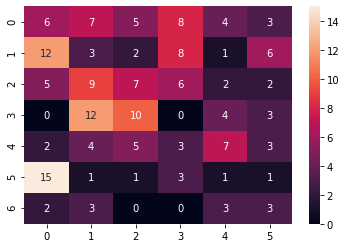

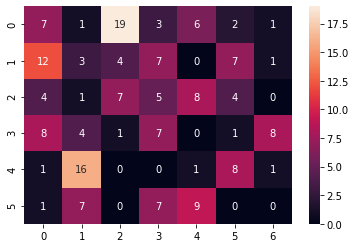

In [309]:
from sklearn.metrics.cluster import contingency_matrix
sns.heatmap(contingency_matrix(label_ephys_exc,label_sta_exc),annot=True)
plt.show()
sns.heatmap(contingency_matrix(label_bio_exc,label_sta_exc),annot=True)
plt.show()
sns.heatmap(contingency_matrix(label_ephys_exc,label_bio_exc),annot=True)
plt.show()

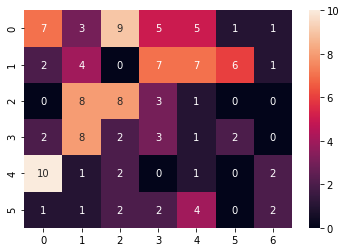

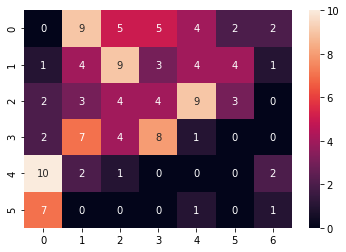

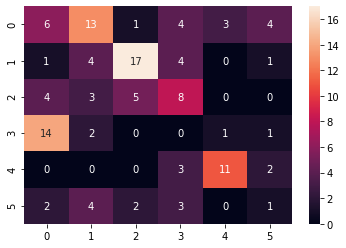

In [227]:
from sklearn.metrics.cluster import contingency_matrix
sns.heatmap(contingency_matrix(label_ephys_inh,label_sta_inh),annot=True)
plt.show()
sns.heatmap(contingency_matrix(label_bio_inh,label_sta_inh),annot=True)
plt.show()
sns.heatmap(contingency_matrix(label_ephys_inh,label_bio_inh),annot=True)
plt.show()

In [57]:

exps_in_common =   (set(ephys_inh.exp_name) & set(df_sta_acsf_inh.exp_name)) & set(df_biophys_inh.exp_name) 

conf_df_inh_ephys = ephys_inh[ephys_inh.exp_name.isin(exps_in_common)]
conf_df_inh_sta = df_sta_acsf_inh[df_sta_acsf_inh.exp_name.isin(exps_in_common)]
conf_df_inh_sta = conf_df_inh_sta.drop_duplicates('exp_name')
conf_df_inh_bio = df_biophys_inh[df_biophys_inh.exp_name.isin(exps_in_common)]

# return_confusion_matrix(conf_df_inh_ephys, conf_df_inh_sta, 'labels_ephys','labels_sta',shuffle=True)
# return_confusion_matrix(conf_df_inh_ephys, conf_df_inh_bio, 'labels_ephys','lables_bio',shuffle=True)
# return_confusion_matrix(conf_df_inh_bio  , conf_df_inh_sta, 'lables_bio'  ,'labels_sta',shuffle=True)

from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

print('Inh: Rand Score        Mututal info score')
print((adjusted_rand_score(conf_df_inh_ephys.labels_ephys,conf_df_inh_sta.labels_sta) , #conf_df_inh_sta.labels_sta
adjusted_mutual_info_score(conf_df_inh_ephys.labels_ephys,conf_df_inh_sta.labels_sta)))

print((adjusted_rand_score(conf_df_inh_ephys.labels_ephys,conf_df_inh_bio.lables_bio) ,
adjusted_mutual_info_score(conf_df_inh_ephys.labels_ephys,conf_df_inh_bio.lables_bio)))


print((adjusted_rand_score(conf_df_inh_sta.labels_sta,conf_df_inh_bio.lables_bio) ,
adjusted_mutual_info_score(conf_df_inh_sta.labels_sta,conf_df_inh_bio.lables_bio)))


print('Exc: Rand Score        Mututal info score')

print((adjusted_rand_score(conf_df_exc_ephys.labels_ephys,conf_df_exc_sta.labels_sta) , #conf_df_exc_sta.labels_sta
adjusted_mutual_info_score(conf_df_exc_ephys.labels_ephys,conf_df_exc_sta.labels_sta)))

print((adjusted_rand_score(conf_df_exc_ephys.labels_ephys,conf_df_exc_bio.lables_bio) ,
adjusted_mutual_info_score(conf_df_exc_ephys.labels_ephys,conf_df_exc_bio.lables_bio)))


print((adjusted_rand_score(conf_df_exc_sta.labels_sta,conf_df_exc_bio.lables_bio) ,
adjusted_mutual_info_score(conf_df_exc_sta.labels_sta,conf_df_exc_bio.lables_bio)))


Inh: Rand Score        Mututal info score
(0.10947340057155193, 0.1689354853809905)
(0.19017418032660063, 0.2326301114515858)
(0.06371427820721921, 0.12254536520615317)
Exc: Rand Score        Mututal info score
(0.030743181024791025, 0.07715598596661565)
(0.1616323183286777, 0.21285722931541898)
(0.05330314464249515, 0.09956571683254403)


In [54]:
def return_mi_rand_score(label1,label2,frac):
    frac = frac
    idx = list(np.random.randint(0,len(label1),int(len(label1)*frac)))
    rand_scores = [] 
    MI_scores = [] 
    for i in range(10):
        rand_scores.append(adjusted_rand_score(np.array(label1)[idx],np.array(label2)[idx]))
        MI_scores.append(adjusted_mutual_info_score(np.array(label1)[idx],np.array(label2)[idx]))
    return rand_scores,MI_scores


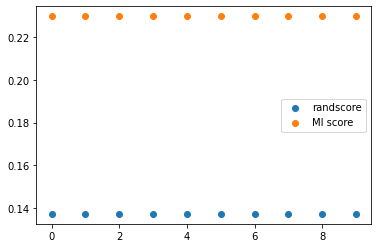

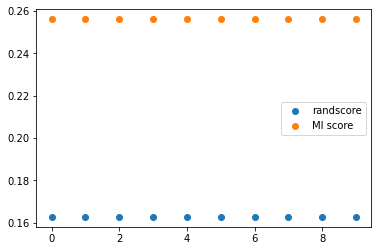

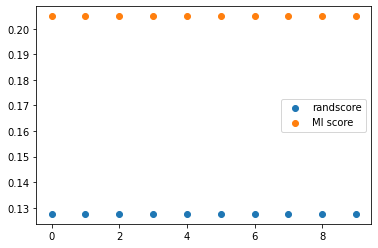

In [55]:
randscore,miscore = return_mi_rand_score(conf_df_inh_ephys.labels_ephys,conf_df_inh_sta.labels_sta,frac=0.9)
plt.scatter(np.arange(len(randscore)),randscore,label='randscore')
plt.scatter(np.arange(len(miscore)),miscore,label='MI score')
plt.legend()
plt.show()

randscore,miscore = return_mi_rand_score(conf_df_inh_ephys.labels_ephys,conf_df_inh_bio.lables_bio,frac=0.9)
plt.scatter(np.arange(len(randscore)),randscore,label='randscore')
plt.scatter(np.arange(len(miscore)),miscore,label='MI score')
plt.legend()
plt.show()

randscore,miscore = return_mi_rand_score(conf_df_inh_bio.lables_bio,conf_df_inh_sta.labels_sta,frac=0.9)
plt.scatter(np.arange(len(randscore)),randscore,label='randscore')
plt.scatter(np.arange(len(miscore)),miscore,label='MI score')
plt.legend()
plt.show()

In [56]:
from xg_boost_classifier import * 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 80.51421166552745


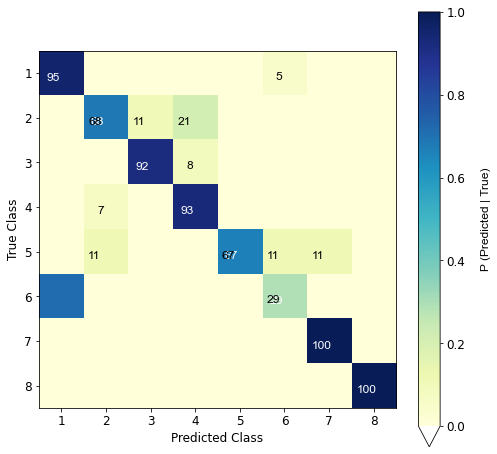

In [57]:
_= return_xg_boost_trees_classification(data_wave_FN_acsf['waveform'],data_wave_FN_acsf.labels_wave)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 94.28571428571429
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 82.83013283013284


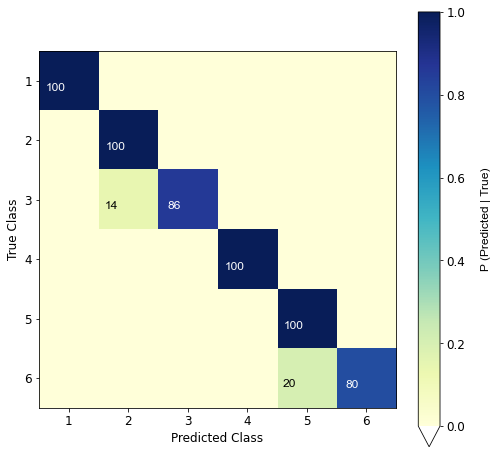

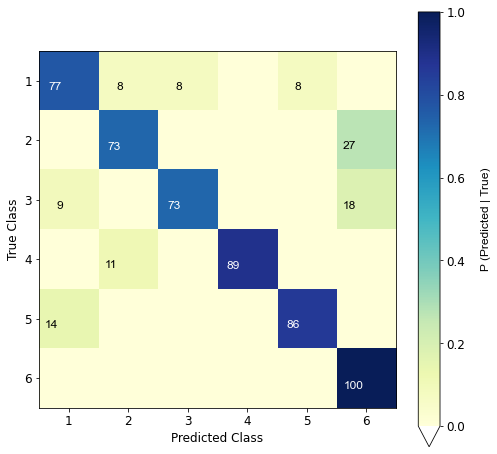

In [58]:
_=return_xg_boost_trees_classification(conf_df_inh_ephys[conf_df_inh_ephys.columns[:-6]].to_numpy(),conf_df_inh_ephys.labels_ephys)
_=return_xg_boost_trees_classification(conf_df_exc_ephys[conf_df_exc_ephys.columns[:-6]].to_numpy(),conf_df_exc_ephys.labels_ephys)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\Nishant Joshi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Mean accuracy 71.42857142857143
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 89.36507936507935


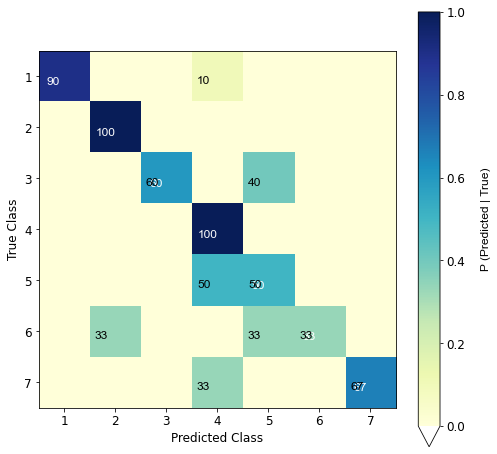

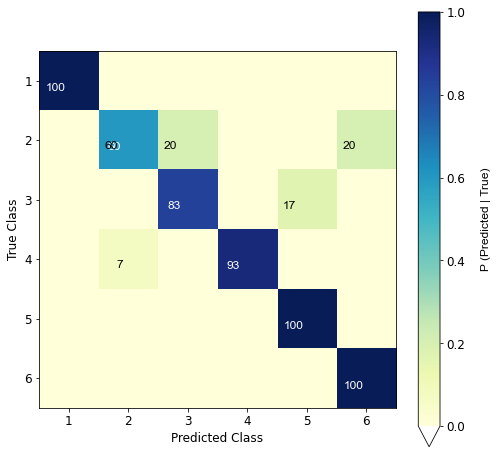

In [59]:
_=return_xg_boost_trees_classification(conf_df_inh_sta['sta'].to_numpy(),conf_df_inh_sta.labels_sta)
_=return_xg_boost_trees_classification(conf_df_exc_sta['sta'].to_numpy(),conf_df_exc_sta.labels_sta)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 71.13095238095237
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mean accuracy 81.75824175824175


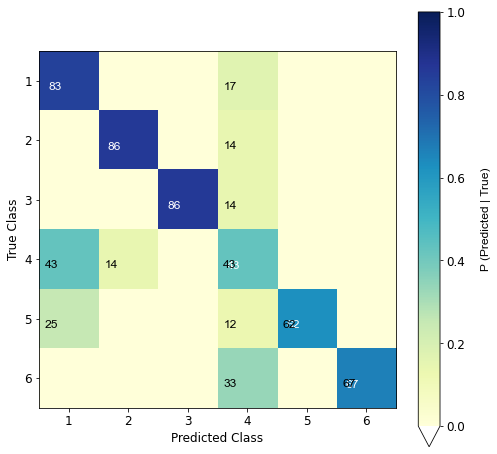

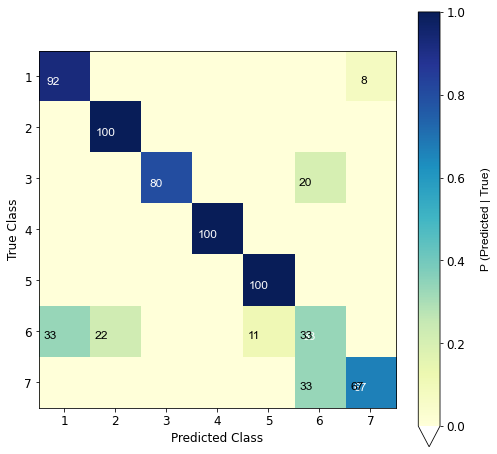

In [60]:

cols_bio = ['C (nF):', 'gl (nS):', 'El (mV):','Vr (mV):', 'Vt* (mV):', 'DV (mV):']

_ = return_xg_boost_trees_classification(conf_df_inh_bio[cols_bio].to_numpy(),conf_df_inh_bio.lables_bio)
_ = return_xg_boost_trees_classification(conf_df_exc_bio[cols_bio].to_numpy(),conf_df_exc_bio.lables_bio)


In [61]:
import numpy as np
from sklearn.cross_decomposition import CCA
from scipy.stats import zscore
from sklearn.model_selection import train_test_split


X_ephys = normalize(conf_df_inh_ephys[conf_df_inh_ephys.columns[:-6]].to_numpy(),axis=0)
X_sta = np.vstack(conf_df_inh_sta['sta'].to_numpy())
X_bio = normalize(np.vstack(conf_df_inh_bio[cols_bio].to_numpy()),axis=0)

X_train_ephys, X_test_ephys, y_train_sta, y_test_sta = train_test_split(X_ephys, X_sta, test_size=0.3, random_state=42)
X_train_ephys, X_test_ephys, y_train_bio, y_test_bio = train_test_split(X_ephys, X_bio, test_size=0.3, random_state=42)
X_train_bio, X_test_bio, y_train_sta, y_test_sta = train_test_split(X_bio, X_sta, test_size=0.3, random_state=42)


def perform_CCA(X,y,n_components=10):
    ca = CCA(n_components=n_components)
    ca.fit(X, y)
    X_c, Y_c = ca.transform(X,y)
    x_weights = ca.x_weights_
    score = ca.score(X , y)
    print(score)
    return X_c,Y_c,ca


_,_,ca_all_E_S = perform_CCA(X_ephys,X_sta,n_components=22)
_,_,ca_all_E_B = perform_CCA(X_ephys,X_bio,n_components=6)
_,_,ca_all_S_B = perform_CCA(X_bio,X_sta,n_components=6)


-1.1226876039749683
0.3881159193642692
-50.20246564725727


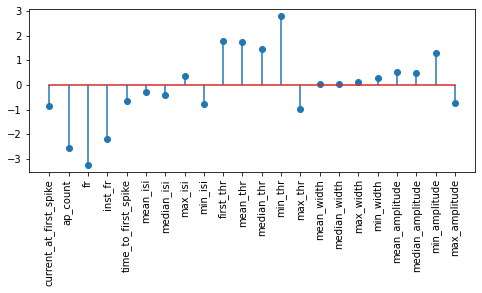

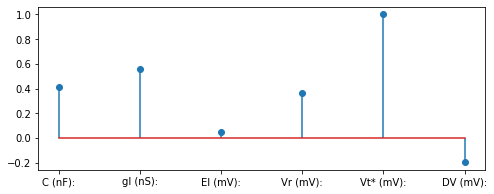

In [62]:
fig,ax1 = plt.subplots(1, figsize=[8,3])
fig,ax2 = plt.subplots(1, figsize=[8,3])

ax1.stem(ca_all_E_B.x_loadings_[:,0])
ax1.set_xticks(np.arange(0,22),conf_df_inh_ephys.columns[:-6],rotation=90)
# ax1.set_xticks([])

ax2.stem(ca_all_E_B.y_loadings_[:,0])
ax2.set_xticks(np.arange(0,6),cols_bio[:])
# ax2.tight_layout=True
plt.show()
